In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import matplotlib.pyplot as plt

In [2]:
print(pd.__version__)

2.0.3


In [3]:
URL = 'https://fbref.com/en/comps/22/2023/2023-Major-League-Soccer-Stats'

In [4]:
response = requests.get(URL)
response

<Response [200]>

In [5]:
response.text

'    \n      \n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/fb/deploy/www/base" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202404081" />\n<!-- InMobi Choice. Consent Manager Tag v3.0 (for TCF 2.2) -->\n<script type="text/javascript" async=true>\n(function() {\n  var host = window.location.hostname;\n  var element = document.createElement(\'script\');\n  var firstScript = document.getElementsByTagName(\'script\')[0];\n  var url = \'https://cmp.inmobi.com\'\n    .concat(\'/choice/\', \'XwNYEpNeFfhfr\', \'/\', host, \'/choice.js?tag_version=V3\');\n  var uspTries = 0;\n  var uspTriesLimit = 3;\n  element.async = true;\n  element.type = \'text/javascript\';\n  element.src = url;\n\n  firstScript.parentNode.insertBefore(element, firstScript

In [6]:
soup = BS(response.text)
soup

<!DOCTYPE html>
<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
<link href="https://cdn.ssref.net/req/202404081" rel="dns-prefetch"/>
<!-- InMobi Choice. Consent Manager Tag v3.0 (for TCF 2.2) -->
<script async="true" type="text/javascript">
(function() {
  var host = window.location.hostname;
  var element = document.createElement('script');
  var firstScript = document.getElementsByTagName('script')[0];
  var url = 'https://cmp.inmobi.com'
    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js?tag_version=V3');
  var uspTries = 0;
  var uspTriesLimit = 3;
  element.async = true;
  element.type = 'text/javascript';
  element.src = url;

  firstScript.parentNode.insertBefore(element, firstScript);

  function makeStub() {
    var TCF_LOCATOR_NAME = '__tcfapiLoc

In [7]:
table_html = str(soup.findAll('table'))

from IPython.core.display import HTML

HTML(table_html)

In [8]:
list_2023 = pd.read_html( str(soup.findAll('table')))
list_2023

[    Rk          Squad  MP   W   D   L  GF  GA  GD  Pts  Pts/MP    xG   xGA  \
 0    1  FC Cincinnati  34  20   9   5  57  39  18   69    2.03  56.3  40.7   
 1    2   Orlando City  34  18   9   7  55  39  16   63    1.85  42.1  40.7   
 2    3  Columbus Crew  34  16   9   9  67  46  21   57    1.68  57.7  41.3   
 3    4   Philadelphia  34  15  10   9  57  41  16   55    1.62  49.4  44.2   
 4    5    New England  34  15  10   9  58  46  12   55    1.62  42.5  45.0   
 5    6    Atlanta Utd  34  13  12   9  66  53  13   51    1.50  48.7  46.0   
 6    7      Nashville  34  13  10  11  39  32   7   49    1.44  41.8  36.2   
 7    8   NY Red Bulls  34  11  10  13  36  39  -3   43    1.26  46.3  33.9   
 8    9      Charlotte  34  10  13  11  45  52  -7   43    1.26  37.0  49.7   
 9   10    CF Montréal  34  12   5  17  36  52 -16   41    1.21  37.8  50.2   
 10  11          NYCFC  34   9  14  11  35  39  -4   41    1.21  42.0  36.1   
 11  12    D.C. United  34  10  10  14  45  49  -4  

In [9]:
table_ref = {'Eastern Conference Overall': list_2023[0],
             'Eastern Conference Home/Aaway' : list_2023[1],
             'Western Conference Overall' : list_2023[2],
             'Western Conference Home/Away' : list_2023[3],
             'Squad Standard Stats Squad Stats' : list_2023[12],
             'Squad Standard Stats Opponet Stats' : list_2023[13],
             'Squad GoalKeeping Squad Stats' : list_2023[14],
             'Squad Goalkeeping Opponent Stats' : list_2023[15],
             'Squad Advanced GoalKeeping Squad Stats' : list_2023[16],
             'Squad Advanced Goalkeeping Opponent Stats' : list_2023[17],
             'Squad Shooting Squad Stats' : list_2023[18],
             'Squad Shooting Opponent Stats' : list_2023[19],
             'Squad Passing Squad Stats' : list_2023[20],
             'Squad Passing Opponent Stats' : list_2023[21],
             'Squad Pass Types Squad Stats' : list_2023[22],
             'Squad Pass Types Opponent Stats' : list_2023[23],
             'Squad Goal and Shot Creation Squad Stats' : list_2023[24],
             'Squad Goal and Shot Creation Opponent Stats' : list_2023[25],
             'Squad Defensive Actions Squad Stats' : list_2023[26],
             'Squad Defensive Actions Opponent Stats' : list_2023[27],
             'Squad Possesion Squad Stats' : list_2023[28],
             'Squad Possession Opponent Stats' : list_2023[29],
             'Squad Playing Time Squad Stats' : list_2023[30],
             'Squad Playing Time Opponent Stats' : list_2023[31],
             'Squad Miscellaneous Stats Squad Stats' : list_2023[32],
             'Squad Miscellanenous Stats Opponent Stats' : list_2023[33],
            
            }

In [10]:
list_2023[18]

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Standard       \
                Squad               # Pl                90s      Gls   Sh   
0         Atlanta Utd                 33               34.0       64  436   
1              Austin                 26               34.0       48  397   
2         CF Montréal                 31               34.0       33  376   
3           Charlotte                 32               34.0       43  341   
4        Chicago Fire                 26               34.0       36  349   
5     Colorado Rapids                 35               34.0       26  359   
6       Columbus Crew                 28               34.0       63  496   
7         D.C. United                 31               34.0       44  456   
8           Dynamo FC                 25               34.0       51  379   
9       FC Cincinnati                 27               34.0       56  439   
10          FC Dallas                 29               34.0       41  340   
11        Inter Miami                 36               34.0       41  359   
12          LA Galaxy                 34               34.0       50  491   
13     Los Angeles FC                 28               34.0       53  517   
14      Minnesota Utd                 30               34.0       43  460   
15          Nashville                 24               34.0       38  378   
16        New England                 32               34.0       55  414   
17       NY Red Bulls                 28               34.0       35  465   
18              NYCFC                 29               34.0       34  416   
19       Orlando City                 28               34.0       54  397   
20       Philadelphia                 23               34.0       54  444   
21   Portland Timbers                 31               34.0       45  410   
22     Real Salt Lake                 31               34.0       48  496   
23           San Jose                 25               34.0       38  406   
24            Seattle                 27               34.0       38  428   
25        Sporting KC                 30               34.0       47  440   
26          St. Louis                 29               34.0       59  455   
27         Toronto FC                 39               34.0       26  347   
28          Vancouver                 28               34.0       51  443   

                                                            Expected        \
    SoT  SoT%  Sh/90 SoT/90  G/Sh G/SoT  Dist  FK  PK PKatt       xG  npxG   
0   168  38.5  12.82   4.94  0.14  0.37  18.1  21   2     4     48.7  45.6   
1   139  35.0  11.68   4.09  0.12  0.33  16.9  13   2     2     42.5  41.0   
2   125  33.2  11.06   3.68  0.08  0.25  18.3   4   2     3     37.8  35.6   
3   108  31.7  10.03   3.18  0.11  0.35  16.8  18   5     5     37.0  33.1   
4   108  30.9  10.26   3.18  0.10  0.31  16.9  13   2     2     38.2  36.6   
5   128  35.7  10.56   3.76  0.07  0.19  17.9  10   2     4     37.9  34.8   
6   169  34.1  14.59   4.97  0.11  0.33  17.6  21   7     7     57.7  52.2   
7   148  32.5  13.41   4.35  0.09  0.28  17.1  14   2     2     45.8  44.3   
8   143  37.7  11.15   4.21  0.12  0.31  17.2  18   6     6     44.9  40.2   
9   155  35.3  12.91   4.56  0.11  0.31  17.6  18   8     9     56.3  49.2   
10  115  33.8  10.00   3.38  0.12  0.35  16.8  14   1     1     37.8  37.1   
11  125  34.8  10.56   3.68  0.10  0.29  18.6  15   5     6     38.2  33.6   
12  175  35.6  14.44   5.15  0.09  0.26  18.7  23   5     5     51.2  47.3   
13  181  35.0  15.21   5.32  0.09  0.25  18.6  29   7     9     55.6  48.5   
14  150  32.6  13.53   4.41  0.08  0.26  17.7  20   4     5     53.4  49.4   
15  113  29.9  11.12   3.32  0.09  0.29  17.0  10   5     5     41.8  38.1   
16  148  35.7  12.18   4.35  0.13  0.35  18.2  17   3     3     42.5  40.3   
17  143  30.8  13.68   4.21  0.07  0.22  17.8  23   3     4     46.3  43.2   
18  148  35.6  12.24   4.35  0.08  0.22  17.4  16   1  

In [11]:
squad_shooting_table = table_ref['Squad Shooting Squad Stats']
a = squad_shooting_table.columns.get_level_values(1)
a


Index(['Squad', '# Pl', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh',
       'G-xG', 'np:G-xG'],
      dtype='object')

In [12]:
squad_shooting_table.columns = list(a)
squad_shooting_table

Squad  # Pl   90s  Gls   Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  \
0        Atlanta Utd    33  34.0   64  436  168  38.5  12.82    4.94  0.14   
1             Austin    26  34.0   48  397  139  35.0  11.68    4.09  0.12   
2        CF Montréal    31  34.0   33  376  125  33.2  11.06    3.68  0.08   
3          Charlotte    32  34.0   43  341  108  31.7  10.03    3.18  0.11   
4       Chicago Fire    26  34.0   36  349  108  30.9  10.26    3.18  0.10   
5    Colorado Rapids    35  34.0   26  359  128  35.7  10.56    3.76  0.07   
6      Columbus Crew    28  34.0   63  496  169  34.1  14.59    4.97  0.11   
7        D.C. United    31  34.0   44  456  148  32.5  13.41    4.35  0.09   
8          Dynamo FC    25  34.0   51  379  143  37.7  11.15    4.21  0.12   
9      FC Cincinnati    27  34.0   56  439  155  35.3  12.91    4.56  0.11   
10         FC Dallas    29  34.0   41  340  115  33.8  10.00    3.38  0.12   
11       Inter Miami    36  34.0   41  359  125  34.8  10.56    3.68  0.10   
12         LA Galaxy    34  34.0   50  491  175  35.6  14.44    5.15  0.09   
13    Los Angeles FC    28  34.0   53  517  181  35.0  15.21    5.32  0.09   
14     Minnesota Utd    30  34.0   43  460  150  32.6  13.53    4.41  0.08   
15         Nashville    24  34.0   38  378  113  29.9  11.12    3.32  0.09   
16       New England    32  34.0   55  414  148  35.7  12.18    4.35  0.13   
17      NY Red Bulls    28  34.0   35  465  143  30.8  13.68    4.21  0.07   
18             NYCFC    29  34.0   34  416  148  35.6  12.24    4.35  0.08   
19      Orlando City    28  34.0   54  397  141  35.5  11.68    4.15  0.12   
20      Philadelphia    23  34.0   54  444  134  30.2  13.06    3.94  0.10   
21  Portland Timbers    31  34.0   45  410  139  33.9  12.06    4.09  0.11   
22    Real Salt Lake    31  34.0   48  496  189  38.1  14.59    5.56  0.10   
23          San Jose    25  34.0   38  406  106  26.1  11.94    3.12  0.08   
24           Seattle    27  34.0   38  428  125  29.2  12.59    3.68  0.09   
25       Sporting KC    30  34.0   47  440  155  35.2  12.94    4.56  0.10   
26         St. Louis    29  34.0   59  455  167  36.7  13.38    4.91  0.12   
27        Toronto FC    39  34.0   26  347  122  35.2  10.21    3.59  0.07   
28         Vancouver    28  34.0   51  443  151  34.1  13.03    4.44  0.10   

    G/SoT  Dist  FK  PK  PKatt    xG  npxG  npxG/Sh  G-xG  np:G-xG  
0    0.37  18.1  21   2      4  48.7  45.6     0.11  15.3     16.4  
1    0.33  16.9  13   2      2  42.5  41.0     0.11   5.5      5.0  
2    0.25  18.3   4   2      3  37.8  35.6     0.10  -4.8     -4.6  
3    0.35  16.8  18   5      5  37.0  33.1     0.10   6.0      4.9  
4    0.31  16.9  13   2      2  38.2  36.6     0.11  -2.2     -2.6  
5    0.19  17.9  10   2      4  37.9  34.8     0.10 -11.9    -10.8  
6    0.33  17.6  21   7      7  57.7  52.2     0.11   5.3      3.8  
7    0.28  17.1  14   2      2  45.8  44.3     0.10  -1.8     -2.3  
8    0.31  17.2  18   6      6  44.9  40.2     0.11   6.1      4.8  
9    0.31  17.6  18   8      9  56.3  49.2     0.11  -0.3     -1.2  
10   0.35  16.8  14   1      1  37.8  37.1     0.11   3.2      2.9  
11   0.29  18.6  15   5      6  38.2  33.6     0.10   2.8      2.4  
12   0.26  18.7  23   5      5  51.2  47.3     0.10  -1.2     -2.3  
13   0.25  18.6  29   7      9  55.6  48.5     0.10  -2.6     -2.5  
14   0.26  17.7  20   4      5  53.4  49.4     0.11 -10.4    -10.4  
15   0.29  17.0  10   5      5  41.8  38.1     0.10  -3.8     -5.1  
16   0.35  18.2  17   3      3  42.5  40.3     0.10  12.5     11.7  
17   0.22  17.8  23   3      4  46.3  43.2     0.10 -11.3    -11.2  
18   0.22  17.4  16   1      3  42.0  39.9     0.10  -8.0     -6.9  
19   0.35  18.4  12   5      5  42.1  38.2     0.10  11.9     10.8  
20   0.32  18.6  10  11     11  49.4  41.0     0.09   4.6      2.0  
21   0.32  17.6  19   1      1  41.2  40.7     0.10   3.8      3.3  
22   0.25  19.6  11   0      0  43.3  43.3     0.09   4.7      4.7  
23   0.31  18.0  1

In [13]:
x = squad_shooting_table['SoT']
y = squad_shooting_table['Gls']


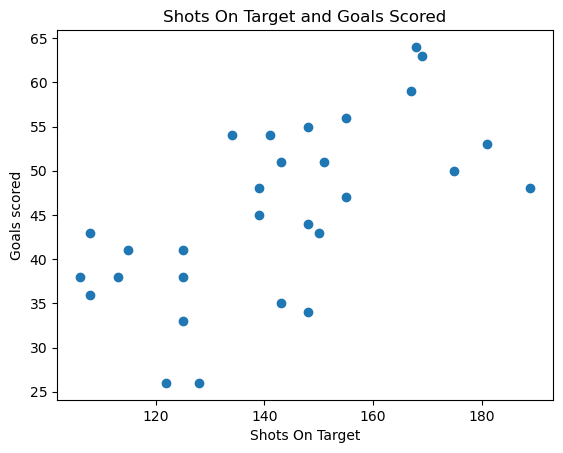

In [14]:
plt.scatter(x,y)
plt.title('Shots On Target and Goals Scored')
plt.ylabel('Goals scored')
plt.xlabel('Shots On Target')
plt.savefig('scatter_shot_on_target.png')

In [15]:
squad_shooting_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Squad    29 non-null     object 
 1   # Pl     29 non-null     int64  
 2   90s      29 non-null     float64
 3   Gls      29 non-null     int64  
 4   Sh       29 non-null     int64  
 5   SoT      29 non-null     int64  
 6   SoT%     29 non-null     float64
 7   Sh/90    29 non-null     float64
 8   SoT/90   29 non-null     float64
 9   G/Sh     29 non-null     float64
 10  G/SoT    29 non-null     float64
 11  Dist     29 non-null     float64
 12  FK       29 non-null     int64  
 13  PK       29 non-null     int64  
 14  PKatt    29 non-null     int64  
 15  xG       29 non-null     float64
 16  npxG     29 non-null     float64
 17  npxG/Sh  29 non-null     float64
 18  G-xG     29 non-null     float64
 19  np:G-xG  29 non-null     float64
dtypes: float64(12), int64(7), object(1)
memory usage: 4.7+ K

In [16]:
squad_shooting_table_drop = squad_shooting_table.drop(columns=('Squad')).reset_index(drop = True)
squad_shooting_table_drop

# Pl   90s  Gls   Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Dist  FK  PK  \
0     33  34.0   64  436  168  38.5  12.82    4.94  0.14   0.37  18.1  21   2   
1     26  34.0   48  397  139  35.0  11.68    4.09  0.12   0.33  16.9  13   2   
2     31  34.0   33  376  125  33.2  11.06    3.68  0.08   0.25  18.3   4   2   
3     32  34.0   43  341  108  31.7  10.03    3.18  0.11   0.35  16.8  18   5   
4     26  34.0   36  349  108  30.9  10.26    3.18  0.10   0.31  16.9  13   2   
5     35  34.0   26  359  128  35.7  10.56    3.76  0.07   0.19  17.9  10   2   
6     28  34.0   63  496  169  34.1  14.59    4.97  0.11   0.33  17.6  21   7   
7     31  34.0   44  456  148  32.5  13.41    4.35  0.09   0.28  17.1  14   2   
8     25  34.0   51  379  143  37.7  11.15    4.21  0.12   0.31  17.2  18   6   
9     27  34.0   56  439  155  35.3  12.91    4.56  0.11   0.31  17.6  18   8   
10    29  34.0   41  340  115  33.8  10.00    3.38  0.12   0.35  16.8  14   1   
11    36  34.0   41  359  125  34.8  10.56    3.68  0.10   0.29  18.6  15   5   
12    34  34.0   50  491  175  35.6  14.44    5.15  0.09   0.26  18.7  23   5   
13    28  34.0   53  517  181  35.0  15.21    5.32  0.09   0.25  18.6  29   7   
14    30  34.0   43  460  150  32.6  13.53    4.41  0.08   0.26  17.7  20   4   
15    24  34.0   38  378  113  29.9  11.12    3.32  0.09   0.29  17.0  10   5   
16    32  34.0   55  414  148  35.7  12.18    4.35  0.13   0.35  18.2  17   3   
17    28  34.0   35  465  143  30.8  13.68    4.21  0.07   0.22  17.8  23   3   
18    29  34.0   34  416  148  35.6  12.24    4.35  0.08   0.22  17.4  16   1   
19    28  34.0   54  397  141  35.5  11.68    4.15  0.12   0.35  18.4  12   5   
20    23  34.0   54  444  134  30.2  13.06    3.94  0.10   0.32  18.6  10  11   
21    31  34.0   45  410  139  33.9  12.06    4.09  0.11   0.32  17.6  19   1   
22    31  34.0   48  496  189  38.1  14.59    5.56  0.10   0.25  19.6  11   0   
23    25  34.0   38  406  106  26.1  11.94    3.12  0.08   0.31  18.0  14   5   
24    27  34.0   38  428  125  29.2  12.59    3.68  0.09   0.30  16.5  14   1   
25    30  34.0   47  440  155  35.2  12.94    4.56  0.10   0.28  18.9  14   4   
26    29  34.0   59  455  167  36.7  13.38    4.91  0.12   0.32  19.2  26   5   
27    39  34.0   26  347  122  35.2  10.21    3.59  0.07   0.20  18.8  27   1   
28    28  34.0   51  443  151  34.1  13.03    4.44  0.10   0.30  16.4  15   6   

    PKatt    xG  npxG  npxG/Sh  G-xG  np:G-xG  
0       4  48.7  45.6     0.11  15.3     16.4  
1       2  42.5  41.0     0.11   5.5      5.0  
2       3  37.8  35.6     0.10  -4.8     -4.6  
3       5  37.0  33.1     0.10   6.0      4.9  
4       2  38.2  36.6     0.11  -2.2     -2.6  
5       4  37.9  34.8     0.10 -11.9    -10.8  
6       7  57.7  52.2     0.11   5.3      3.8  
7       2  45.8  44.3     0.10  -1.8     -2.3  
8       6  44.9  40.2     0.11   6.1      4.8  
9       9  56.3  49.2     0.11  -0.3     -1.2  
10      1  37.8  37.1     0.11   3.2      2.9  
11      6  38.2  33.6     0.10   2.8      2.4  
12      5  51.2  47.3     0.10  -1.2     -2.3  
13      9  55.6  48.5     0.10  -2.6     -2.5  
14      5  53.4  49.4     0.11 -10.4    -10.4  
15      5  41.8  38.1     0.10  -3.8     -5.1  
16      3  42.5  40.3     0.10  12.5     11.7  
17      4  46.3  43.2     0.10 -11.3    -11.2  
18      3  42.0  39.9     0.10  -8.0     -6.9  
19      5  42.1  38.2     0.10  11.9     10.8  
20     11  49.4  41.0     0.09   4.6      2.0  
21      1  41.2  40.7     0.10   3.8      3.3  
22      0  43.3  43.3     0.09   4.7      4.7  
23      6  44.3  39.5     0.10  -6.3     -6.5  
24      1  48.1  47.3     0.11 -10.1    -10.3  
25      6  41.1  36.3     0.08   5.9      6.7  
26      5  42.6  38.7     0.09  16.4     15.3  
27      1  31.3  30.5     0.09  -5.3     -5.5  
28      8  54.6  48.3     0.11  -3.6     -3.3

In [17]:
squad_shooting_table_drop.corr()[['SoT','Gls']]

SoT       Gls
# Pl     0.106134 -0.259429
90s           NaN       NaN
Gls      0.638751  1.000000
Sh       0.851824  0.551616
SoT      1.000000  0.638751
SoT%     0.648689  0.395994
Sh/90    0.851870  0.551279
SoT/90   0.999992  0.638884
G/Sh     0.221841  0.766314
G/SoT   -0.085976  0.665263
Dist     0.485605  0.177986
FK       0.433518  0.287891
PK       0.133120  0.511861
PKatt    0.189712  0.456852
xG       0.601525  0.625833
npxG     0.635942  0.563791
npxG/Sh -0.134764  0.130106
G-xG     0.309553  0.751718
np:G-xG  0.330973  0.734180

In [18]:
squad_shooting_table_drop.corr()[['SoT','Gls','Dist']].head(7)

SoT       Gls      Dist
# Pl   0.106134 -0.259429  0.376200
90s         NaN       NaN       NaN
Gls    0.638751  1.000000  0.177986
Sh     0.851824  0.551616  0.351135
SoT    1.000000  0.638751  0.485605
SoT%   0.648689  0.395994  0.396051
Sh/90  0.851870  0.551279  0.351182

In [19]:
squad_shooting_table_drop['Dist'].mean()

17.83448275862069

#  Shot Creation and Passing

In [20]:

squad_shot_creation = table_ref['Squad Goal and Shot Creation Squad Stats']
squad_shot_creation



Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  SCA         \
                Squad               # Pl                90s  SCA  SCA90   
0         Atlanta Utd                 33               34.0  801  23.56   
1              Austin                 26               34.0  687  20.21   
2         CF Montréal                 31               34.0  653  19.21   
3           Charlotte                 32               34.0  605  17.79   
4        Chicago Fire                 26               34.0  614  18.06   
5     Colorado Rapids                 35               34.0  646  19.00   
6       Columbus Crew                 28               34.0  881  25.91   
7         D.C. United                 31               34.0  785  23.09   
8           Dynamo FC                 25               34.0  688  20.24   
9       FC Cincinnati                 27               34.0  775  22.79   
10          FC Dallas                 29               34.0  607  17.85   
11        Inter Miami                 36               34.0  648  19.06   
12          LA Galaxy                 34               34.0  903  26.56   
13     Los Angeles FC                 28               34.0  891  26.21   
14      Minnesota Utd                 30               34.0  825  24.26   
15          Nashville                 24               34.0  651  19.15   
16        New England                 32               34.0  741  21.79   
17       NY Red Bulls                 28               34.0  781  22.97   
18              NYCFC                 29               34.0  739  21.74   
19       Orlando City                 28               34.0  707  20.79   
20       Philadelphia                 23               34.0  782  23.00   
21   Portland Timbers                 31               34.0  702  20.65   
22     Real Salt Lake                 31               34.0  866  25.47   
23           San Jose                 25               34.0  714  21.00   
24            Seattle                 27               34.0  765  22.50   
25        Sporting KC                 30               34.0  781  22.97   
26          St. Louis                 29               34.0  789  23.21   
27         Toronto FC                 39               34.0  621  18.26   
28          Vancouver                 28               34.0  801  23.56   

   SCA Types                           GCA       GCA Types                   \
    PassLive PassDead  TO  Sh Fld Def  GCA GCA90  PassLive PassDead  TO  Sh   
0        594       62  55  37  39  14  109  3.21        76        7   7  10   
1        495       74  40  42  31   5   86  2.53        67        6   1  10   
2        503       52  24  35  25  14   56  1.65        40        1   4   8   
3        455       47  42  22  33   6   81  2.38        67        2   5   2   
4        464       46  31  34  32   7   68  2.00        49        5   2   6   
5        446       72  49  33  36  10   45  1.32        29        7   5   1   
6        655       58  63  52  34  19  108  3.18        81        5  11   5   
7        549       72  45  52  50  17   70  2.06        48        4   4  10   
8        494       53  46  43  43   9   93  2.74        70        6   3   5   
9        529       71  61  53  50  11   94  2.76        59        5   9  10   
10       421       60  46  35  34  11   75  2.21        58        2   7   4   
11       475       48  35  49  29  12   75  2.21        53        5   5   8   
12       696       52  53  45  45  12   89  2.62        61        7   6   8   
13       658       74  48  42  53  16   83  2.44        58        5   5   7   
14       601       59  61  54  39  11   70  2.06        45        3   4  10   
15       433       70  41  56  40  11   70  2.06        38        6   8   7   
16       557       56  52  33  28  15   95  2.79        70        7   4   9   
17       519       86  52  57  48  19   57  1.68        36        6   3   8   
18       534       73  39  42  45   6   59  1.74        44        5   1   5   
19       519      

In [21]:
dethklok = squad_shot_creation.columns.get_level_values(1)
list(dethklok)
squad_shot_creation.columns=dethklok
squad_shot_creation

Squad  # Pl   90s  SCA  SCA90  PassLive  PassDead  TO  Sh  Fld  \
0        Atlanta Utd    33  34.0  801  23.56       594        62  55  37   39   
1             Austin    26  34.0  687  20.21       495        74  40  42   31   
2        CF Montréal    31  34.0  653  19.21       503        52  24  35   25   
3          Charlotte    32  34.0  605  17.79       455        47  42  22   33   
4       Chicago Fire    26  34.0  614  18.06       464        46  31  34   32   
5    Colorado Rapids    35  34.0  646  19.00       446        72  49  33   36   
6      Columbus Crew    28  34.0  881  25.91       655        58  63  52   34   
7        D.C. United    31  34.0  785  23.09       549        72  45  52   50   
8          Dynamo FC    25  34.0  688  20.24       494        53  46  43   43   
9      FC Cincinnati    27  34.0  775  22.79       529        71  61  53   50   
10         FC Dallas    29  34.0  607  17.85       421        60  46  35   34   
11       Inter Miami    36  34.0  648  19.06       475        48  35  49   29   
12         LA Galaxy    34  34.0  903  26.56       696        52  53  45   45   
13    Los Angeles FC    28  34.0  891  26.21       658        74  48  42   53   
14     Minnesota Utd    30  34.0  825  24.26       601        59  61  54   39   
15         Nashville    24  34.0  651  19.15       433        70  41  56   40   
16       New England    32  34.0  741  21.79       557        56  52  33   28   
17      NY Red Bulls    28  34.0  781  22.97       519        86  52  57   48   
18             NYCFC    29  34.0  739  21.74       534        73  39  42   45   
19      Orlando City    28  34.0  707  20.79       519        65  39  41   28   
20      Philadelphia    23  34.0  782  23.00       548        84  23  70   43   
21  Portland Timbers    31  34.0  702  20.65       503        57  43  41   37   
22    Real Salt Lake    31  34.0  866  25.47       651        66  60  36   31   
23          San Jose    25  34.0  714  21.00       503        71  46  48   35   
24           Seattle    27  34.0  765  22.50       568        77  31  48   30   
25       Sporting KC    30  34.0  781  22.97       548        78  48  54   39   
26         St. Louis    29  34.0  789  23.21       549        69  46  45   59   
27        Toronto FC    39  34.0  621  18.26       455        39  52  34   31   
28         Vancouver    28  34.0  801  23.56       571        83  33  54   43   

    Def  GCA  GCA90  PassLive  PassDead  TO  Sh  Fld  Def  
0    14  109   3.21        76         7   7  10    7    2  
1     5   86   2.53        67         6   1  10    2    0  
2    14   56   1.65        40         1   4   8    1    2  
3     6   81   2.38        67         2   5   2    5    0  
4     7   68   2.00        49         5   2   6    5    1  
5    10   45   1.32        29         7   5   1    3    0  
6    19  108   3.18        81         5  11   5    5    1  
7    17   70   2.06        48         4   4  10    2    2  
8     9   93   2.74        70         6   3   5    8    1  
9    11   94   2.76        59         5   9  10    8    3  
10   11   75   2.21        58         2   7   4    3    1  
11   12   75   2.21        53         5   5   8    4    0  
12   12   89   2.62        61         7   6   8    6    1  
13   16   83   2.44        58         5   5   7    6    2  
14   11   70   2.06        45         3   4  10    6    2  
15   11   70   2.06        38         6   8   7   10    1  
16   15   95   2.79        70         7   4   9    2    3  
17   19   57   1.68        36         6   3   8    4    0  
18    6   59   1.74        44         5   1   5    4    0  
19   15  100   2.94        72         5   8   7    7    1  
20   14   95   2.79        66         7   4   8   10    0  
21   21   80   2.35        59         3   8   8    0    2  
22   22   87   2.56        64         5   5   7    5    1  
23   11   68   2.00        48         3   3   6    6    2  
24   11   63   1.85        44         4   3   9    3    0  
25   14   81   2.38     

In [22]:
squad_shot_creation_drop = squad_shot_creation.drop(columns = ('Squad'))

In [23]:
squad_shot_creation_drop

# Pl   90s  SCA  SCA90  PassLive  PassDead  TO  Sh  Fld  Def  GCA  GCA90  \
0     33  34.0  801  23.56       594        62  55  37   39   14  109   3.21   
1     26  34.0  687  20.21       495        74  40  42   31    5   86   2.53   
2     31  34.0  653  19.21       503        52  24  35   25   14   56   1.65   
3     32  34.0  605  17.79       455        47  42  22   33    6   81   2.38   
4     26  34.0  614  18.06       464        46  31  34   32    7   68   2.00   
5     35  34.0  646  19.00       446        72  49  33   36   10   45   1.32   
6     28  34.0  881  25.91       655        58  63  52   34   19  108   3.18   
7     31  34.0  785  23.09       549        72  45  52   50   17   70   2.06   
8     25  34.0  688  20.24       494        53  46  43   43    9   93   2.74   
9     27  34.0  775  22.79       529        71  61  53   50   11   94   2.76   
10    29  34.0  607  17.85       421        60  46  35   34   11   75   2.21   
11    36  34.0  648  19.06       475        48  35  49   29   12   75   2.21   
12    34  34.0  903  26.56       696        52  53  45   45   12   89   2.62   
13    28  34.0  891  26.21       658        74  48  42   53   16   83   2.44   
14    30  34.0  825  24.26       601        59  61  54   39   11   70   2.06   
15    24  34.0  651  19.15       433        70  41  56   40   11   70   2.06   
16    32  34.0  741  21.79       557        56  52  33   28   15   95   2.79   
17    28  34.0  781  22.97       519        86  52  57   48   19   57   1.68   
18    29  34.0  739  21.74       534        73  39  42   45    6   59   1.74   
19    28  34.0  707  20.79       519        65  39  41   28   15  100   2.94   
20    23  34.0  782  23.00       548        84  23  70   43   14   95   2.79   
21    31  34.0  702  20.65       503        57  43  41   37   21   80   2.35   
22    31  34.0  866  25.47       651        66  60  36   31   22   87   2.56   
23    25  34.0  714  21.00       503        71  46  48   35   11   68   2.00   
24    27  34.0  765  22.50       568        77  31  48   30   11   63   1.85   
25    30  34.0  781  22.97       548        78  48  54   39   14   81   2.38   
26    29  34.0  789  23.21       549        69  46  45   59   21   95   2.79   
27    39  34.0  621  18.26       455        39  52  34   31   10   49   1.44   
28    28  34.0  801  23.56       571        83  33  54   43   17   86   2.53   

    PassLive  PassDead  TO  Sh  Fld  Def  
0         76         7   7  10    7    2  
1         67         6   1  10    2    0  
2         40         1   4   8    1    2  
3         67         2   5   2    5    0  
4         49         5   2   6    5    1  
5         29         7   5   1    3    0  
6         81         5  11   5    5    1  
7         48         4   4  10    2    2  
8         70         6   3   5    8    1  
9         59         5   9  10    8    3  
10        58         2   7   4    3    1  
11        53         5   5   8    4    0  
12        61         7   6   8    6    1  
13        58         5   5   7    6    2  
14        45         3   4  10    6    2  
15        38         6   8   7   10    1  
16        70         7   4   9    2    3  
17        36         6   3   8    4    0  
18        44         5   1   5    4    0  
19        72         5   8   7    7    1  
20        66         7   4   8   10    0  
21        59         3   8   8    0    2  
22        64         5   5   7    5    1  
23        48         3   3   6    6    2  
24        44         4   3   9    3    0  
25        56         4   9   8    4    0  
26        58        13   5   8   10    1  
27        39         3   2   3    2    0  
28        52        10   2  11    8    3

In [24]:
squad_shot_creation_drop.corr()

# Pl  90s       SCA     SCA90  PassLive  PassDead        TO  \
# Pl      1.000000  NaN -0.105059 -0.105368  0.012437 -0.527120  0.282800   
90s            NaN  NaN       NaN       NaN       NaN       NaN       NaN   
SCA      -0.105059  NaN  1.000000  0.999999  0.955267  0.407369  0.444677   
SCA90    -0.105368  NaN  0.999999  1.000000  0.955250  0.407590  0.444161   
PassLive  0.012437  NaN  0.955267  0.955250  1.000000  0.191554  0.393736   
PassDead -0.527120  NaN  0.407369  0.407590  0.191554  1.000000 -0.107915   
TO        0.282800  NaN  0.444677  0.444161  0.393736 -0.107915  1.000000   
Sh       -0.492674  NaN  0.447440  0.447525  0.251328  0.620719 -0.074784   
Fld      -0.234092  NaN  0.486302  0.486654  0.295431  0.461375  0.224330   
Def       0.057155  NaN  0.553946  0.553946  0.478505  0.250804  0.243932   
GCA      -0.258296  NaN  0.463265  0.463159  0.478135  0.024192  0.245618   
GCA90    -0.258105  NaN  0.463492  0.463388  0.478651  0.022995  0.246098   
PassLive -0.155843  NaN  0.313041  0.312881  0.393081 -0.157165  0.220033   
PassDead -0.131604  NaN  0.354753  0.355073  0.257270  0.365203  0.025488   
TO        0.022591  NaN  0.219892  0.219556  0.174537 -0.049393  0.409399   
Sh       -0.241488  NaN  0.487580  0.487728  0.431123  0.376990 -0.053925   
Fld      -0.494298  NaN  0.282792  0.282839  0.174776  0.279143  0.021277   
Def      -0.100167  NaN  0.291914  0.291817  0.289052 -0.013893  0.228475   

                Sh       Fld       Def       GCA     GCA90  PassLive  \
# Pl     -0.492674 -0.234092  0.057155 -0.258296 -0.258105 -0.155843   
90s            NaN       NaN       NaN       NaN       NaN       NaN   
SCA       0.447440  0.486302  0.553946  0.463265  0.463492  0.313041   
SCA90     0.447525  0.486654  0.553946  0.463159  0.463388  0.312881   
PassLive  0.251328  0.295431  0.478505  0.478135  0.478651  0.393081   
PassDead  0.620719  0.461375  0.250804  0.024192  0.022995 -0.157165   
TO       -0.074784  0.224330  0.243932  0.245618  0.246098  0.220033   
Sh        1.000000  0.438141  0.264521  0.146584  0.146577 -0.081132   
Fld       0.438141  1.000000  0.262880  0.156772  0.156276 -0.061209   
Def       0.264521  0.262880  1.000000  0.318089  0.317549  0.178914   
GCA       0.146584  0.156772  0.318089  1.000000  0.999981  0.929195   
GCA90     0.146577  0.156276  0.317549  0.999981  1.000000  0.929582   
PassLive -0.081132 -0.061209  0.178914  0.929195  0.929582  1.000000   
PassDead  0.263852  0.518017  0.298473  0.393421  0.392390  0.160256   
TO        0.131029  0.038840  0.382927  0.477716  0.477198  0.390014   
Sh        0.515592  0.220086  0.329375  0.363428  0.363347  0.160923   
Fld       0.452617  0.496974  0.053912  0.474050  0.473742  0.229947   
Def       0.017201  0.167715  0.334602  0.332761  0.332281  0.186593   

          PassDead        TO        Sh       Fld       Def  
# Pl     -0.131604  0.022591 -0.241488 -0.494298 -0.100167  
90s            NaN       NaN       NaN       NaN       NaN  
SCA       0.354753  0.219892  0.487580  0.282792  0.291914  
SCA90     0.355073  0.219556  0.487728  0.282839  0.291817  
PassLive  0.257270  0.174537  0.431123  0.174776  0.289052  
PassDead  0.365203 -0.049393  0.376990  0.279143 -0.013893  
TO        0.025488  0.409399 -0.053925  0.021277  0.228475  
Sh        0.263852  0.131029  0.515592  0.452617  0.017201  
Fld       0.518017  0.038840  0.220086  0.496974  0.167715  
Def       0.298473  0.382927  0.329375  0.053912  0.334602  
GCA       0.393421  0.477716  0.363428  0.474050  0.332761  
GCA90     0.392390  0.477198  0.363347  0.473742  0.332281  
PassLive  0.160256  0.390014  0.160923  0.229947  0.186593  
PassDead  1.000000 -0.083805  0.275695  0.567492  0.078242  
TO       -0.083805  1.000000 -0.014754  0.169522  0.168072  
Sh        0.275695 -0.014754  1.000000  0.135272  0.499147  
Fld       0.567492  0.169522  0.135272  1.000000  0.102477  
Def       0.078242  0.168072  0.499147  0.102477  1.000000

In [25]:
squad_passing = table_ref['Squad Passing Squad Stats']
squad_passing_columns = squad_passing.columns.get_level_values(1)
list(squad_passing_columns)
squad_passing.columns = squad_passing_columns
squad_passing

Squad  # Pl   90s    Cmp    Att  Cmp%  TotDist  PrgDist   Cmp  \
0        Atlanta Utd    33  34.0  14829  17769  83.5   269615    91650  6308   
1             Austin    26  34.0  12792  15969  80.1   241687    83952  5112   
2        CF Montréal    31  34.0  12302  15735  78.2   232730    88047  5057   
3          Charlotte    32  34.0  13333  16923  78.8   239817    89186  5888   
4       Chicago Fire    26  34.0  11692  15034  77.8   210026    80918  5262   
5    Colorado Rapids    35  34.0  11639  14756  78.9   219730    79150  4730   
6      Columbus Crew    28  34.0  15996  18983  84.3   269177    95587  7679   
7        D.C. United    31  34.0  11789  15288  77.1   215891    91349  5230   
8          Dynamo FC    25  34.0  13984  16932  82.6   249327    86903  6300   
9      FC Cincinnati    27  34.0  12208  15462  79.0   220983    84809  5266   
10         FC Dallas    29  34.0  13135  16363  80.3   227089    81174  6193   
11       Inter Miami    36  34.0  15031  18246  82.4   268563    89938  6668   
12         LA Galaxy    34  34.0  16306  19140  85.2   276098    96565  7715   
13    Los Angeles FC    28  34.0  13415  16727  80.2   237217    86411  5844   
14     Minnesota Utd    30  34.0  12086  15479  78.1   217907    85333  5376   
15         Nashville    24  34.0  12245  15660  78.2   234277    86788  4851   
16       New England    32  34.0  13274  16588  80.0   248333    88558  5330   
17      NY Red Bulls    28  34.0   9572  13643  70.2   170150    70259  4364   
18             NYCFC    29  34.0  14558  17566  82.9   264520    92296  6014   
19      Orlando City    28  34.0  12616  15783  79.9   224276    84467  5839   
20      Philadelphia    23  34.0  10676  14240  75.0   202053    81099  4509   
21  Portland Timbers    31  34.0  10846  14357  75.5   206464    80123  4511   
22    Real Salt Lake    31  34.0  12922  16082  80.4   248037    88794  5265   
23          San Jose    25  34.0  12937  16197  79.9   227998    85775  5986   
24           Seattle    27  34.0  14934  18423  81.1   262721    92722  6882   
25       Sporting KC    30  34.0  14630  17696  82.7   271033    86974  6155   
26         St. Louis    29  34.0   9719  13478  72.1   178817    78955  4152   
27        Toronto FC    39  34.0  14408  17419  82.7   246271    88896  6909   
28         Vancouver    28  34.0  13297  16612  80.0   251041    88554  5239   

     Att  ...  Cmp%  Ast   xAG    xA  A-xAG   KP   1/3  PPA  CrsPA  PrgP  
0   6998  ...  63.9   44  36.4  38.1    7.6  340  1057  293     55  1384  
1   5691  ...  53.7   37  32.3  31.4    4.7  291   958  217     85  1239  
2   5871  ...  56.3   22  27.8  29.3   -5.8  283   993  207     57  1265  
3   6662  ...  49.5   29  26.9  33.7    2.1  263  1015  296     91  1360  
4   6000  ...  53.6   29  28.1  29.5    0.9  260   917  258     77  1217  
5   5351  ...  53.9   20  28.9  26.7   -8.9  289   931  193     51  1088  
6   8447  ...  58.6   49  42.7  39.7    6.3  388  1334  327     66  1703  
7   6036  ...  53.5   27  33.1  38.0   -6.1  339  1025  301     82  1263  
8   7016  ...  60.0   36  31.7  36.8    4.3  287  1033  280     59  1202  
9   6027  ...  55.8   35  39.5  38.1   -4.5  346  1002  264     52  1241  
10  6896  ...  51.0   34  30.9  31.1    3.1  268   924  240     63  1150  
11  7389  ...  59.5   29  24.9  29.7    4.1  262  1144  223     48  1304  
12  8430  ...  62.6   37  38.6  37.9   -1.6  387  1277  284     70  1547  
13  6624  ...  54.7   32  38.6  37.0   -6.6  384  1207  317     43  1543  
14  6144  ...  55.9   23  38.4  43.6  -15.4  336  1090  315     76  1405  
15  5566  ...  56.9   23  30.7  27.2   -7.7  284   921  231     77  1123  
16  6090  ...  58.1   37  29.0  31.2    8.0  314  1027  251     72  1308  
17  5315  ...  43.0   24  31.7  32.0   -7.7  336   943  232     52  1159  
18  6701  ...  59.8   26  33.0  34.3   -7.0  321  1082  258     47  1418  
19  6552  ...  55.2   41  31.5  34.0    9.5  307  1061  275     63  1361  
20  5356  ...  55.2   35  32.2  32.7   

In [26]:
passing_and_shot_creation = squad_passing.merge(squad_shot_creation, how = 'inner', on = 'Squad')
passing_and_shot_creation

Squad  # Pl_x  90s_x    Cmp    Att  Cmp%  TotDist  PrgDist  \
0        Atlanta Utd      33   34.0  14829  17769  83.5   269615    91650   
1             Austin      26   34.0  12792  15969  80.1   241687    83952   
2        CF Montréal      31   34.0  12302  15735  78.2   232730    88047   
3          Charlotte      32   34.0  13333  16923  78.8   239817    89186   
4       Chicago Fire      26   34.0  11692  15034  77.8   210026    80918   
5    Colorado Rapids      35   34.0  11639  14756  78.9   219730    79150   
6      Columbus Crew      28   34.0  15996  18983  84.3   269177    95587   
7        D.C. United      31   34.0  11789  15288  77.1   215891    91349   
8          Dynamo FC      25   34.0  13984  16932  82.6   249327    86903   
9      FC Cincinnati      27   34.0  12208  15462  79.0   220983    84809   
10         FC Dallas      29   34.0  13135  16363  80.3   227089    81174   
11       Inter Miami      36   34.0  15031  18246  82.4   268563    89938   
12         LA Galaxy      34   34.0  16306  19140  85.2   276098    96565   
13    Los Angeles FC      28   34.0  13415  16727  80.2   237217    86411   
14     Minnesota Utd      30   34.0  12086  15479  78.1   217907    85333   
15         Nashville      24   34.0  12245  15660  78.2   234277    86788   
16       New England      32   34.0  13274  16588  80.0   248333    88558   
17      NY Red Bulls      28   34.0   9572  13643  70.2   170150    70259   
18             NYCFC      29   34.0  14558  17566  82.9   264520    92296   
19      Orlando City      28   34.0  12616  15783  79.9   224276    84467   
20      Philadelphia      23   34.0  10676  14240  75.0   202053    81099   
21  Portland Timbers      31   34.0  10846  14357  75.5   206464    80123   
22    Real Salt Lake      31   34.0  12922  16082  80.4   248037    88794   
23          San Jose      25   34.0  12937  16197  79.9   227998    85775   
24           Seattle      27   34.0  14934  18423  81.1   262721    92722   
25       Sporting KC      30   34.0  14630  17696  82.7   271033    86974   
26         St. Louis      29   34.0   9719  13478  72.1   178817    78955   
27        Toronto FC      39   34.0  14408  17419  82.7   246271    88896   
28         Vancouver      28   34.0  13297  16612  80.0   251041    88554   

     Cmp   Att  ...  Fld  Def  GCA  GCA90  PassLive  PassDead  TO  Sh  Fld  \
0   6308  6998  ...   39   14  109   3.21        76         7   7  10    7   
1   5112  5691  ...   31    5   86   2.53        67         6   1  10    2   
2   5057  5871  ...   25   14   56   1.65        40         1   4   8    1   
3   5888  6662  ...   33    6   81   2.38        67         2   5   2    5   
4   5262  6000  ...   32    7   68   2.00        49         5   2   6    5   
5   4730  5351  ...   36   10   45   1.32        29         7   5   1    3   
6   7679  8447  ...   34   19  108   3.18        81         5  11   5    5   
7   5230  6036  ...   50   17   70   2.06        48         4   4  10    2   
8   6300  7016  ...   43    9   93   2.74        70         6   3   5    8   
9   5266  6027  ...   50   11   94   2.76        59         5   9  10    8   
10  6193  6896  ...   34   11   75   2.21        58         2   7   4    3   
11  6668  7389  ...   29   12   75   2.21        53         5   5   8    4   
12  7715  8430  ...   45   12   89   2.62        61         7   6   8    6   
13  5844  6624  ...   53   16   83   2.44        58         5   5   7    6   
14  5376  6144  ...   39   11   70   2.06        45         3   4  10    6   
15  4851  5566  ...   40   11   70   2.06        38         6   8   7   10   
16  5330  6090  ...   28   15   95   2.79        70         7   4   9    2   
17  4364  5315  ...   48   19   57   1.68        36         6   3   8    4   
18  6014  6701  ...   45    6   59   1.74        44         5   1   5    4   
19  5839  6552  ...   28   15  100   2.94        72         5   8   7    7   
20  4509  5356  ...   43   14   95   2.79        66         7   4 

In [27]:
passing_and_shot_creation_drop = passing_and_shot_creation.drop(columns = ('Squad'))
passing_and_shot_creation_drop

# Pl_x  90s_x    Cmp    Att  Cmp%  TotDist  PrgDist   Cmp   Att  Cmp%  \
0       33   34.0  14829  17769  83.5   269615    91650  6308  6998  90.1   
1       26   34.0  12792  15969  80.1   241687    83952  5112  5691  89.8   
2       31   34.0  12302  15735  78.2   232730    88047  5057  5871  86.1   
3       32   34.0  13333  16923  78.8   239817    89186  5888  6662  88.4   
4       26   34.0  11692  15034  77.8   210026    80918  5262  6000  87.7   
5       35   34.0  11639  14756  78.9   219730    79150  4730  5351  88.4   
6       28   34.0  15996  18983  84.3   269177    95587  7679  8447  90.9   
7       31   34.0  11789  15288  77.1   215891    91349  5230  6036  86.6   
8       25   34.0  13984  16932  82.6   249327    86903  6300  7016  89.8   
9       27   34.0  12208  15462  79.0   220983    84809  5266  6027  87.4   
10      29   34.0  13135  16363  80.3   227089    81174  6193  6896  89.8   
11      36   34.0  15031  18246  82.4   268563    89938  6668  7389  90.2   
12      34   34.0  16306  19140  85.2   276098    96565  7715  8430  91.5   
13      28   34.0  13415  16727  80.2   237217    86411  5844  6624  88.2   
14      30   34.0  12086  15479  78.1   217907    85333  5376  6144  87.5   
15      24   34.0  12245  15660  78.2   234277    86788  4851  5566  87.2   
16      32   34.0  13274  16588  80.0   248333    88558  5330  6090  87.5   
17      28   34.0   9572  13643  70.2   170150    70259  4364  5315  82.1   
18      29   34.0  14558  17566  82.9   264520    92296  6014  6701  89.7   
19      28   34.0  12616  15783  79.9   224276    84467  5839  6552  89.1   
20      23   34.0  10676  14240  75.0   202053    81099  4509  5356  84.2   
21      31   34.0  10846  14357  75.5   206464    80123  4511  5263  85.7   
22      31   34.0  12922  16082  80.4   248037    88794  5265  5894  89.3   
23      25   34.0  12937  16197  79.9   227998    85775  5986  6727  89.0   
24      27   34.0  14934  18423  81.1   262721    92722  6882  7682  89.6   
25      30   34.0  14630  17696  82.7   271033    86974  6155  6810  90.4   
26      29   34.0   9719  13478  72.1   178817    78955  4152  5062  82.0   
27      39   34.0  14408  17419  82.7   246271    88896  6909  7611  90.8   
28      28   34.0  13297  16612  80.0   251041    88554  5239  5928  88.4   

    ...  Fld  Def  GCA  GCA90  PassLive  PassDead  TO  Sh  Fld  Def  
0   ...   39   14  109   3.21        76         7   7  10    7    2  
1   ...   31    5   86   2.53        67         6   1  10    2    0  
2   ...   25   14   56   1.65        40         1   4   8    1    2  
3   ...   33    6   81   2.38        67         2   5   2    5    0  
4   ...   32    7   68   2.00        49         5   2   6    5    1  
5   ...   36   10   45   1.32        29         7   5   1    3    0  
6   ...   34   19  108   3.18        81         5  11   5    5    1  
7   ...   50   17   70   2.06        48         4   4  10    2    2  
8   ...   43    9   93   2.74        70         6   3   5    8    1  
9   ...   50   11   94   2.76        59         5   9  10    8    3  
10  ...   34   11   75   2.21        58         2   7   4    3    1  
11  ...   29   12   75   2.21        53         5   5   8    4    0  
12  ...   45   12   89   2.62        61         7   6   8    6    1  
13  ...   53   16   83   2.44        58         5   5   7    6    2  
14  ...   39   11   70   2.06        45         3   4  10    6    2  
15  ...   40   11   70   2.06        38         6   8   7   10    1  
16  ...   28   15   95   2.79        70         7   4   9    2    3  
17  ...   48   19   57   1.68        36         6   3   8    4    0  
18  ...   45    6   59   1.74        44         5   1   5    4    0  
19  ...   28   15  100   2.94        72         5   8   7    7    1  
20  ...   43   14   95   2.79        66         7   4   8   10    0  
21  ...   37   21   80   2.35        59         3   8   8    0    2  
22  ...   31   22   87   2.56        64         5   5   7    5    1  
23  ...   35 

In [28]:
passing_and_shot_creation_drop.corr()[['SCA','KP','1/3']]

SCA        KP       1/3
# Pl_x   -0.105059 -0.105363  0.164923
90s_x          NaN       NaN       NaN
Cmp       0.181404  0.188486  0.731732
Att       0.190279  0.191749  0.760215
Cmp%      0.103602  0.128222  0.595522
TotDist   0.157273  0.162550  0.667299
PrgDist   0.292387  0.300428  0.671509
Cmp       0.163367  0.167821  0.731415
Att       0.182716  0.183509  0.741911
Cmp%     -0.019295  0.011182  0.518698
Cmp       0.159929  0.176443  0.632545
Att       0.175677  0.188326  0.652353
Cmp%      0.042093  0.074441  0.488114
Cmp       0.069752  0.042456  0.203081
Att      -0.156295 -0.178369 -0.215946
Cmp%      0.267576  0.251702  0.558454
Ast       0.444567  0.453822  0.342350
xAG       0.759751  0.816630  0.480969
xA        0.624037  0.631214  0.510966
A-xAG    -0.075024 -0.106903  0.019082
KP        0.974448  1.000000  0.551921
1/3       0.575698  0.551921  1.000000
PPA       0.609162  0.595306  0.559026
CrsPA     0.116824  0.088299 -0.026201
PrgP      0.637772  0.625825  0.893909
# Pl_y   -0.105059 -0.105363  0.164923
90s_y          NaN       NaN       NaN
SCA       1.000000  0.974448  0.575698
SCA90     0.999999  0.974403  0.575559
PassLive  0.955267  0.927451  0.669852
PassDead  0.407369  0.417947 -0.016205
TO        0.444677  0.467202  0.160741
Sh        0.447440  0.405199  0.197153
Fld       0.486302  0.469163 -0.071288
Def       0.553946  0.533804  0.142750
GCA       0.463265  0.446015  0.231724
GCA90     0.463492  0.446295  0.232258
PassLive  0.313041  0.309042  0.268964
PassDead  0.354753  0.302368 -0.115911
TO        0.219892  0.279905  0.268728
Sh        0.487580  0.408739  0.139609
Fld       0.282792  0.251852 -0.091562
Def       0.291914  0.309121 -0.112048

In [29]:
PPA = passing_and_shot_creation_drop['PPA']
SCA = passing_and_shot_creation_drop['SCA']
attacking_third = passing_and_shot_creation_drop['1/3']

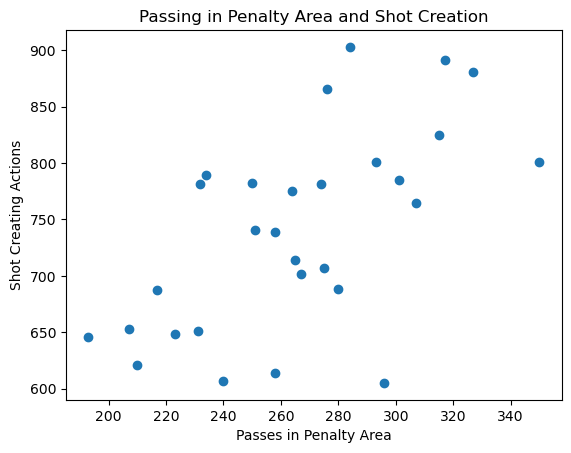

In [30]:
plt.scatter(PPA,SCA)
plt.title('Passing in Penalty Area and Shot Creation')
plt.xlabel('Passes in Penalty Area')
plt.ylabel('Shot Creating Actions')
plt.savefig('Passing_in_penalty_area_SCA')

In [31]:
SCA2 = passing_and_shot_creation_drop['SCA']
PrgP = passing_and_shot_creation_drop['PrgP']

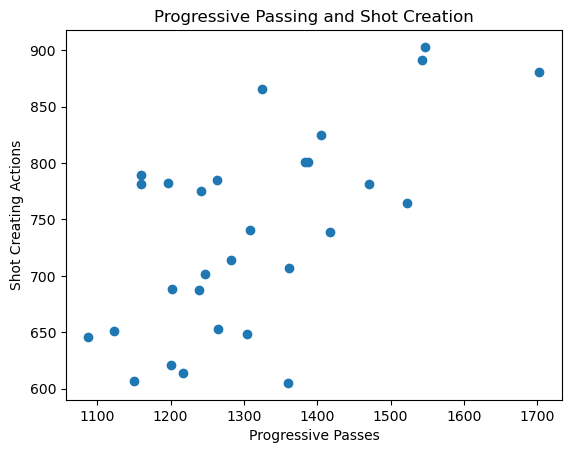

In [32]:
plt.scatter(PrgP,SCA2)
plt.title('Progressive Passing and Shot Creation')
plt.xlabel('Progressive Passes')
plt.ylabel('Shot Creating Actions')
plt.savefig('progressive_Passing_shot_creation.png')

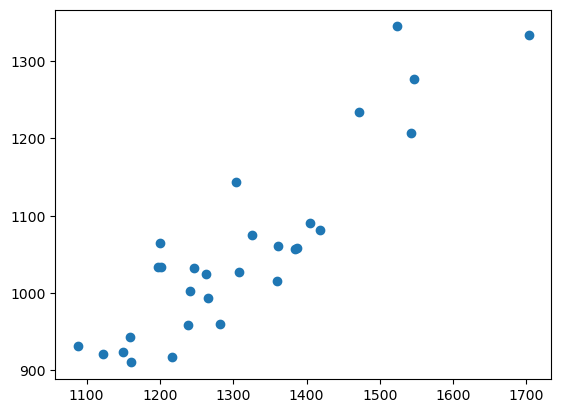

In [33]:
plt.scatter(PrgP,attacking_third)

# Possession and Passing

In [34]:
possession_table = table_ref['Squad Possesion Squad Stats']
possession_table

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                Squad               # Pl               Poss   
0         Atlanta Utd                 33               55.6   
1              Austin                 26               51.2   
2         CF Montréal                 31               48.3   
3           Charlotte                 32               52.6   
4        Chicago Fire                 26               46.1   
5     Colorado Rapids                 35               46.6   
6       Columbus Crew                 28               57.1   
7         D.C. United                 31               49.5   
8           Dynamo FC                 25               51.6   
9       FC Cincinnati                 27               48.8   
10          FC Dallas                 29               48.8   
11        Inter Miami                 36               54.6   
12          LA Galaxy                 34               55.2   
13     Los Angeles FC                 28               51.2   
14      Minnesota Utd                 30               47.1   
15          Nashville                 24               47.7   
16        New England                 32               49.7   
17       NY Red Bulls                 28               46.7   
18              NYCFC                 29               52.6   
19       Orlando City                 28               50.4   
20       Philadelphia                 23               46.1   
21   Portland Timbers                 31               46.0   
22     Real Salt Lake                 31               49.3   
23           San Jose                 25               47.5   
24            Seattle                 27               54.2   
25        Sporting KC                 30               52.1   
26          St. Louis                 29               44.2   
27         Toronto FC                 39               50.1   
28          Vancouver                 28               49.0   

   Unnamed: 3_level_0 Touches                                          ...  \
                  90s Touches Def Pen Def 3rd Mid 3rd Att 3rd Att Pen  ...   
0                34.0   21262    2272    7180    9471    4824     761  ...   
1                34.0   19258    2402    7008    8257    4171     611  ...   
2                34.0   19159    2029    6512    8648    4179     561  ...   
3                34.0   20188    2186    6680    9034    4640     657  ...   
4                34.0   18622    2094    6544    8280    3965     616  ...   
5                34.0   18040    2191    6571    7866    3768     594  ...   
6                34.0   22489    1883    6306   10219    6166     896  ...   
7                34.0   18782    1994    6256    7895    4818     844  ...   
8                34.0   20349    2323    7171    8834    4529     709  ...   
9                34.0   19270    1977    6200    8803    4476     768  ...   
10               34.0   19710    2307    6961    8766    4150     633  ...   
11               34.0   21609    2175    6789   10149    4870     563  ...   
12               34.0   22568    2285    7226   10453    5075     717  ...   
13               34.0   20566    1712    5976    9284    5555     874  ...   
14               34.0   19314    2105    6248    8174    5072     811  ...   
15               34.0   19009    2120    6610    8673    3898     643  ...   
16               34.0   20096    2193    6637    8954    4694     645  ...   
17               34.0   17607    1368    4819    8002    4996     758  ...   
18               34.0   21169    2242    7300    9634    4406     681  ...   
19               34.0   18957    1960    6130    8412    4597     672  ...   
20               34.0   17743    1772    5435    7973    4526     671  ...   
21               34.0   18007    1882    5642    7957    4613     717  ...   
22               34.0   19553    1874    6288    8715    4759     681  ...   
23               34.0   19826    2225    6743    8527    4764     690  ...   
24               34.0

In [35]:
possession_columns = possession_table.columns.get_level_values(1)

In [36]:
list(possession_columns)

['Squad',
 '# Pl',
 'Poss',
 '90s',
 'Touches',
 'Def Pen',
 'Def 3rd',
 'Mid 3rd',
 'Att 3rd',
 'Att Pen',
 'Live',
 'Att',
 'Succ',
 'Succ%',
 'Tkld',
 'Tkld%',
 'Carries',
 'TotDist',
 'PrgDist',
 'PrgC',
 '1/3',
 'CPA',
 'Mis',
 'Dis',
 'Rec',
 'PrgR']

In [37]:
possession_table.columns=possession_columns

In [38]:
possession_table

Squad  # Pl  Poss   90s  Touches  Def Pen  Def 3rd  Mid 3rd  \
0        Atlanta Utd    33  55.6  34.0    21262     2272     7180     9471   
1             Austin    26  51.2  34.0    19258     2402     7008     8257   
2        CF Montréal    31  48.3  34.0    19159     2029     6512     8648   
3          Charlotte    32  52.6  34.0    20188     2186     6680     9034   
4       Chicago Fire    26  46.1  34.0    18622     2094     6544     8280   
5    Colorado Rapids    35  46.6  34.0    18040     2191     6571     7866   
6      Columbus Crew    28  57.1  34.0    22489     1883     6306    10219   
7        D.C. United    31  49.5  34.0    18782     1994     6256     7895   
8          Dynamo FC    25  51.6  34.0    20349     2323     7171     8834   
9      FC Cincinnati    27  48.8  34.0    19270     1977     6200     8803   
10         FC Dallas    29  48.8  34.0    19710     2307     6961     8766   
11       Inter Miami    36  54.6  34.0    21609     2175     6789    10149   
12         LA Galaxy    34  55.2  34.0    22568     2285     7226    10453   
13    Los Angeles FC    28  51.2  34.0    20566     1712     5976     9284   
14     Minnesota Utd    30  47.1  34.0    19314     2105     6248     8174   
15         Nashville    24  47.7  34.0    19009     2120     6610     8673   
16       New England    32  49.7  34.0    20096     2193     6637     8954   
17      NY Red Bulls    28  46.7  34.0    17607     1368     4819     8002   
18             NYCFC    29  52.6  34.0    21169     2242     7300     9634   
19      Orlando City    28  50.4  34.0    18957     1960     6130     8412   
20      Philadelphia    23  46.1  34.0    17743     1772     5435     7973   
21  Portland Timbers    31  46.0  34.0    18007     1882     5642     7957   
22    Real Salt Lake    31  49.3  34.0    19553     1874     6288     8715   
23          San Jose    25  47.5  34.0    19826     2225     6743     8527   
24           Seattle    27  54.2  34.0    21718     1802     5966    10319   
25       Sporting KC    30  52.1  34.0    21112     1855     6262     9437   
26         St. Louis    29  44.2  34.0    17617     1957     5883     7261   
27        Toronto FC    39  50.1  34.0    21066     2314     7497     9460   
28         Vancouver    28  49.0  34.0    20062     2061     6481     8993   

    Att 3rd  Att Pen  ...  Carries  TotDist  PrgDist  PrgC  1/3  CPA  Mis  \
0      4824      761  ...    13062    67840    34725   635  439  168  469   
1      4171      611  ...    11403    59638    29637   503  361   93  399   
2      4179      561  ...    10879    55529    27289   511  387  104  540   
3      4640      657  ...    10886    53078    25350   454  353  105  492   
4      3965      616  ...    10055    50298    24410   510  332  121  518   
5      3768      594  ...     9934    51070    25105   489  299  150  465   
6      6166      896  ...    14338    74417    37395   746  527  222  564   
7      4818      844  ...     9991    50684    24772   482  359  145  435   
8      4529      709  ...    12279    58339    29677   487  398  147  464   
9      4476      768  ...    10250    52732    25711   504  368  169  511   
10     4150      633  ...    11026    52530    26589   495  366  127  489   
11     4870      563  ...    13088    63465    31022   540  442  115  522   
12     5075      717  ...    13900    72394    36198   704  519  160  495   
13     5555      874  ...    12079    64257    32716   692  453  220  572   
14     5072      811  ...    10606    53992    27118   525  395  131  522   
15     3898      643  ...    10161    48823    22838   441  295  114  430   
16     4694      645  ...    11704    65984    31954   669  454  159  486   
17     4996      758  ...     8830    49513    23599   553  386  156  615   
18     4406      681  ...    12005    63921    32261   557  384  155  521   
19     4597      672  ...    10761    55960    27533   513  414  126  417   
20     4526      671  ...     9371    47926    23407   45

In [39]:
who

BS	 HTML	 PPA	 PrgP	 SCA	 SCA2	 URL	 a	 attacking_third	 
dethklok	 list_2023	 passing_and_shot_creation	 passing_and_shot_creation_drop	 pd	 plt	 possession_columns	 possession_table	 requests	 
response	 soup	 squad_passing	 squad_passing_columns	 squad_shooting_table	 squad_shooting_table_drop	 squad_shot_creation	 squad_shot_creation_drop	 table_html	 
table_ref	 x	 y	 


In [40]:
passing_table = table_ref['Squad Passing Squad Stats']
passing_table

Squad  # Pl   90s    Cmp    Att  Cmp%  TotDist  PrgDist   Cmp  \
0        Atlanta Utd    33  34.0  14829  17769  83.5   269615    91650  6308   
1             Austin    26  34.0  12792  15969  80.1   241687    83952  5112   
2        CF Montréal    31  34.0  12302  15735  78.2   232730    88047  5057   
3          Charlotte    32  34.0  13333  16923  78.8   239817    89186  5888   
4       Chicago Fire    26  34.0  11692  15034  77.8   210026    80918  5262   
5    Colorado Rapids    35  34.0  11639  14756  78.9   219730    79150  4730   
6      Columbus Crew    28  34.0  15996  18983  84.3   269177    95587  7679   
7        D.C. United    31  34.0  11789  15288  77.1   215891    91349  5230   
8          Dynamo FC    25  34.0  13984  16932  82.6   249327    86903  6300   
9      FC Cincinnati    27  34.0  12208  15462  79.0   220983    84809  5266   
10         FC Dallas    29  34.0  13135  16363  80.3   227089    81174  6193   
11       Inter Miami    36  34.0  15031  18246  82.4   268563    89938  6668   
12         LA Galaxy    34  34.0  16306  19140  85.2   276098    96565  7715   
13    Los Angeles FC    28  34.0  13415  16727  80.2   237217    86411  5844   
14     Minnesota Utd    30  34.0  12086  15479  78.1   217907    85333  5376   
15         Nashville    24  34.0  12245  15660  78.2   234277    86788  4851   
16       New England    32  34.0  13274  16588  80.0   248333    88558  5330   
17      NY Red Bulls    28  34.0   9572  13643  70.2   170150    70259  4364   
18             NYCFC    29  34.0  14558  17566  82.9   264520    92296  6014   
19      Orlando City    28  34.0  12616  15783  79.9   224276    84467  5839   
20      Philadelphia    23  34.0  10676  14240  75.0   202053    81099  4509   
21  Portland Timbers    31  34.0  10846  14357  75.5   206464    80123  4511   
22    Real Salt Lake    31  34.0  12922  16082  80.4   248037    88794  5265   
23          San Jose    25  34.0  12937  16197  79.9   227998    85775  5986   
24           Seattle    27  34.0  14934  18423  81.1   262721    92722  6882   
25       Sporting KC    30  34.0  14630  17696  82.7   271033    86974  6155   
26         St. Louis    29  34.0   9719  13478  72.1   178817    78955  4152   
27        Toronto FC    39  34.0  14408  17419  82.7   246271    88896  6909   
28         Vancouver    28  34.0  13297  16612  80.0   251041    88554  5239   

     Att  ...  Cmp%  Ast   xAG    xA  A-xAG   KP   1/3  PPA  CrsPA  PrgP  
0   6998  ...  63.9   44  36.4  38.1    7.6  340  1057  293     55  1384  
1   5691  ...  53.7   37  32.3  31.4    4.7  291   958  217     85  1239  
2   5871  ...  56.3   22  27.8  29.3   -5.8  283   993  207     57  1265  
3   6662  ...  49.5   29  26.9  33.7    2.1  263  1015  296     91  1360  
4   6000  ...  53.6   29  28.1  29.5    0.9  260   917  258     77  1217  
5   5351  ...  53.9   20  28.9  26.7   -8.9  289   931  193     51  1088  
6   8447  ...  58.6   49  42.7  39.7    6.3  388  1334  327     66  1703  
7   6036  ...  53.5   27  33.1  38.0   -6.1  339  1025  301     82  1263  
8   7016  ...  60.0   36  31.7  36.8    4.3  287  1033  280     59  1202  
9   6027  ...  55.8   35  39.5  38.1   -4.5  346  1002  264     52  1241  
10  6896  ...  51.0   34  30.9  31.1    3.1  268   924  240     63  1150  
11  7389  ...  59.5   29  24.9  29.7    4.1  262  1144  223     48  1304  
12  8430  ...  62.6   37  38.6  37.9   -1.6  387  1277  284     70  1547  
13  6624  ...  54.7   32  38.6  37.0   -6.6  384  1207  317     43  1543  
14  6144  ...  55.9   23  38.4  43.6  -15.4  336  1090  315     76  1405  
15  5566  ...  56.9   23  30.7  27.2   -7.7  284   921  231     77  1123  
16  6090  ...  58.1   37  29.0  31.2    8.0  314  1027  251     72  1308  
17  5315  ...  43.0   24  31.7  32.0   -7.7  336   943  232     52  1159  
18  6701  ...  59.8   26  33.0  34.3   -7.0  321  1082  258     47  1418  
19  6552  ...  55.2   41  31.5  34.0    9.5  307  1061  275     63  1361  
20  5356  ...  55.2   35  32.2  32.7   

In [41]:
passing_possesion_tables = passing_table.merge(possession_table, how = 'inner', on = 'Squad')
passing_possesion_tables

Squad  # Pl_x  90s_x    Cmp  Att_x  Cmp%  TotDist_x  PrgDist_x  \
0        Atlanta Utd      33   34.0  14829  17769  83.5     269615      91650   
1             Austin      26   34.0  12792  15969  80.1     241687      83952   
2        CF Montréal      31   34.0  12302  15735  78.2     232730      88047   
3          Charlotte      32   34.0  13333  16923  78.8     239817      89186   
4       Chicago Fire      26   34.0  11692  15034  77.8     210026      80918   
5    Colorado Rapids      35   34.0  11639  14756  78.9     219730      79150   
6      Columbus Crew      28   34.0  15996  18983  84.3     269177      95587   
7        D.C. United      31   34.0  11789  15288  77.1     215891      91349   
8          Dynamo FC      25   34.0  13984  16932  82.6     249327      86903   
9      FC Cincinnati      27   34.0  12208  15462  79.0     220983      84809   
10         FC Dallas      29   34.0  13135  16363  80.3     227089      81174   
11       Inter Miami      36   34.0  15031  18246  82.4     268563      89938   
12         LA Galaxy      34   34.0  16306  19140  85.2     276098      96565   
13    Los Angeles FC      28   34.0  13415  16727  80.2     237217      86411   
14     Minnesota Utd      30   34.0  12086  15479  78.1     217907      85333   
15         Nashville      24   34.0  12245  15660  78.2     234277      86788   
16       New England      32   34.0  13274  16588  80.0     248333      88558   
17      NY Red Bulls      28   34.0   9572  13643  70.2     170150      70259   
18             NYCFC      29   34.0  14558  17566  82.9     264520      92296   
19      Orlando City      28   34.0  12616  15783  79.9     224276      84467   
20      Philadelphia      23   34.0  10676  14240  75.0     202053      81099   
21  Portland Timbers      31   34.0  10846  14357  75.5     206464      80123   
22    Real Salt Lake      31   34.0  12922  16082  80.4     248037      88794   
23          San Jose      25   34.0  12937  16197  79.9     227998      85775   
24           Seattle      27   34.0  14934  18423  81.1     262721      92722   
25       Sporting KC      30   34.0  14630  17696  82.7     271033      86974   
26         St. Louis      29   34.0   9719  13478  72.1     178817      78955   
27        Toronto FC      39   34.0  14408  17419  82.7     246271      88896   
28         Vancouver      28   34.0  13297  16612  80.0     251041      88554   

     Cmp  Att_x  ...  Carries  TotDist_y  PrgDist_y  PrgC  1/3_y  CPA  Mis  \
0   6308   6998  ...    13062      67840      34725   635    439  168  469   
1   5112   5691  ...    11403      59638      29637   503    361   93  399   
2   5057   5871  ...    10879      55529      27289   511    387  104  540   
3   5888   6662  ...    10886      53078      25350   454    353  105  492   
4   5262   6000  ...    10055      50298      24410   510    332  121  518   
5   4730   5351  ...     9934      51070      25105   489    299  150  465   
6   7679   8447  ...    14338      74417      37395   746    527  222  564   
7   5230   6036  ...     9991      50684      24772   482    359  145  435   
8   6300   7016  ...    12279      58339      29677   487    398  147  464   
9   5266   6027  ...    10250      52732      25711   504    368  169  511   
10  6193   6896  ...    11026      52530      26589   495    366  127  489   
11  6668   7389  ...    13088      63465      31022   540    442  115  522   
12  7715   8430  ...    13900      72394      36198   704    519  160  495   
13  5844   6624  ...    12079      64257      32716   692    453  220  572   
14  5376   6144  ...    10606      53992      27118   525    395  131  522   
15  4851   5566  ...    10161      48823      22838   441    295  114  430   
16  5330   6090  ...    11704      65984      31954   669    454  159  486   
17  4364   5315  ...     8830      49513      23599   553    386  156  615   
18  6014   6701  ...    12005      63921      32261   557    384  155  521   
19  5839   6552  ...    

In [42]:
passing_possesion_tables_drop = passing_possesion_tables.drop(columns=('Squad'))
passing_possesion_tables_drop

# Pl_x  90s_x    Cmp  Att_x  Cmp%  TotDist_x  PrgDist_x   Cmp  Att_x  \
0       33   34.0  14829  17769  83.5     269615      91650  6308   6998   
1       26   34.0  12792  15969  80.1     241687      83952  5112   5691   
2       31   34.0  12302  15735  78.2     232730      88047  5057   5871   
3       32   34.0  13333  16923  78.8     239817      89186  5888   6662   
4       26   34.0  11692  15034  77.8     210026      80918  5262   6000   
5       35   34.0  11639  14756  78.9     219730      79150  4730   5351   
6       28   34.0  15996  18983  84.3     269177      95587  7679   8447   
7       31   34.0  11789  15288  77.1     215891      91349  5230   6036   
8       25   34.0  13984  16932  82.6     249327      86903  6300   7016   
9       27   34.0  12208  15462  79.0     220983      84809  5266   6027   
10      29   34.0  13135  16363  80.3     227089      81174  6193   6896   
11      36   34.0  15031  18246  82.4     268563      89938  6668   7389   
12      34   34.0  16306  19140  85.2     276098      96565  7715   8430   
13      28   34.0  13415  16727  80.2     237217      86411  5844   6624   
14      30   34.0  12086  15479  78.1     217907      85333  5376   6144   
15      24   34.0  12245  15660  78.2     234277      86788  4851   5566   
16      32   34.0  13274  16588  80.0     248333      88558  5330   6090   
17      28   34.0   9572  13643  70.2     170150      70259  4364   5315   
18      29   34.0  14558  17566  82.9     264520      92296  6014   6701   
19      28   34.0  12616  15783  79.9     224276      84467  5839   6552   
20      23   34.0  10676  14240  75.0     202053      81099  4509   5356   
21      31   34.0  10846  14357  75.5     206464      80123  4511   5263   
22      31   34.0  12922  16082  80.4     248037      88794  5265   5894   
23      25   34.0  12937  16197  79.9     227998      85775  5986   6727   
24      27   34.0  14934  18423  81.1     262721      92722  6882   7682   
25      30   34.0  14630  17696  82.7     271033      86974  6155   6810   
26      29   34.0   9719  13478  72.1     178817      78955  4152   5062   
27      39   34.0  14408  17419  82.7     246271      88896  6909   7611   
28      28   34.0  13297  16612  80.0     251041      88554  5239   5928   

    Cmp%  ...  Carries  TotDist_y  PrgDist_y  PrgC  1/3_y  CPA  Mis  Dis  \
0   90.1  ...    13062      67840      34725   635    439  168  469  239   
1   89.8  ...    11403      59638      29637   503    361   93  399  229   
2   86.1  ...    10879      55529      27289   511    387  104  540  257   
3   88.4  ...    10886      53078      25350   454    353  105  492  232   
4   87.7  ...    10055      50298      24410   510    332  121  518  276   
5   88.4  ...     9934      51070      25105   489    299  150  465  170   
6   90.9  ...    14338      74417      37395   746    527  222  564  263   
7   86.6  ...     9991      50684      24772   482    359  145  435  270   
8   89.8  ...    12279      58339      29677   487    398  147  464  275   
9   87.4  ...    10250      52732      25711   504    368  169  511  282   
10  89.8  ...    11026      52530      26589   495    366  127  489  242   
11  90.2  ...    13088      63465      31022   540    442  115  522  287   
12  91.5  ...    13900      72394      36198   704    519  160  495  276   
13  88.2  ...    12079      64257      32716   692    453  220  572  273   
14  87.5  ...    10606      53992      27118   525    395  131  522  320   
15  87.2  ...    10161      48823      22838   441    295  114  430  245   
16  87.5  ...    11704      65984      31954   669    454  159  486  255   
17  82.1  ...     8830      49513      23599   553    386  156  615  293   
18  89.7  ...    12005      63921      32261   557    384  155  521  302   
19  89.1  ...    10761      55960      27533   513    414  126  417  238   
20  84.2  ...     9371      47926      23407   452    357   96  427  224   
21  85.7  ...     9595      49879      25781   511 

In [43]:
passing_possesion_tables_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 50 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   # Pl_x     29 non-null     int64  
 1   90s_x      29 non-null     float64
 2   Cmp        29 non-null     int64  
 3   Att_x      29 non-null     int64  
 4   Cmp%       29 non-null     float64
 5   TotDist_x  29 non-null     int64  
 6   PrgDist_x  29 non-null     int64  
 7   Cmp        29 non-null     int64  
 8   Att_x      29 non-null     int64  
 9   Cmp%       29 non-null     float64
 10  Cmp        29 non-null     int64  
 11  Att_x      29 non-null     int64  
 12  Cmp%       29 non-null     float64
 13  Cmp        29 non-null     int64  
 14  Att_x      29 non-null     int64  
 15  Cmp%       29 non-null     float64
 16  Ast        29 non-null     int64  
 17  xAG        29 non-null     float64
 18  xA         29 non-null     float64
 19  A-xAG      29 non-null     float64
 20  KP         2

In [44]:
passing_possesion_tables_drop.corr()[['Poss','Touches','Att_x','1/3_y','PrgP']]

Poss   Touches     Att_x     Att_x     Att_x     Att_x  \
# Pl_x     0.265542  0.312670  0.305498  0.292681  0.260390 -0.055770   
90s_x           NaN       NaN       NaN       NaN       NaN       NaN   
Cmp        0.907938  0.980218  0.993544  0.909803  0.935306 -0.206600   
Att_x      0.921329  0.989758  1.000000  0.917664  0.934553 -0.207035   
Cmp%       0.807391  0.887793  0.915268  0.816324  0.890260 -0.143877   
TotDist_x  0.859877  0.914337  0.944542  0.757040  0.964582  0.063222   
PrgDist_x  0.786602  0.840563  0.852926  0.737318  0.833119 -0.083244   
Cmp        0.852849  0.933627  0.933066  0.996442  0.764214 -0.480348   
Att_x      0.844012  0.924500  0.917664  1.000000  0.735433 -0.520269   
Cmp%       0.748116  0.816157  0.859618  0.781155  0.814327 -0.112906   
Cmp        0.853548  0.913135  0.932625  0.736186  0.996316 -0.017666   
Att_x      0.857556  0.918784  0.934553  0.735433  1.000000 -0.019458   
Cmp%       0.744760  0.805313  0.844918  0.666303  0.901159  0.029800   
Cmp        0.260854  0.243280  0.302990 -0.009952  0.430525  0.777199   
Att_x     -0.177821 -0.276979 -0.207035 -0.520269 -0.019458  1.000000   
Cmp%       0.610681  0.687066  0.709270  0.550384  0.712219  0.145703   
Ast        0.439442  0.292546  0.295385  0.292087  0.264238 -0.108311   
xAG        0.342913  0.320150  0.285015  0.274009  0.297088 -0.242696   
xA         0.408830  0.375814  0.350780  0.358422  0.306271 -0.192953   
A-xAG      0.227138  0.083384  0.112428  0.116949  0.069469  0.060803   
KP         0.277738  0.251846  0.191749  0.183509  0.188326 -0.178369   
1/3_x      0.744676  0.779180  0.760215  0.741911  0.652353 -0.215946   
PPA        0.381271  0.392081  0.365887  0.349705  0.326983 -0.123355   
CrsPA     -0.030829 -0.051192 -0.005596 -0.121710  0.058229  0.377409   
PrgP       0.731699  0.753055  0.724498  0.681207  0.682951 -0.270984   
# Pl_y     0.265542  0.312670  0.305498  0.292681  0.260390 -0.055770   
Poss       1.000000  0.907026  0.921329  0.844012  0.857556 -0.177821   
90s_y           NaN       NaN       NaN       NaN       NaN       NaN   
Touches    0.907026  1.000000  0.989758  0.924500  0.918784 -0.276979   
Def Pen    0.226575  0.312535  0.355981  0.281173  0.406290 -0.015463   
Def 3rd    0.450973  0.564552  0.594403  0.505123  0.627965 -0.093978   
Mid 3rd    0.881243  0.959322  0.956078  0.882958  0.882222 -0.229128   
Att 3rd    0.541934  0.544640  0.487019  0.525452  0.375513 -0.275729   
Att Pen    0.255511  0.218170  0.161752  0.192104  0.132179 -0.238805   
Live       0.907036  0.999998  0.989825  0.924527  0.918785 -0.276601   
Att_y      0.326322  0.394024  0.306395  0.325581  0.294198 -0.346806   
Succ       0.342189  0.445808  0.367997  0.382303  0.351965 -0.350860   
Succ%      0.132638  0.283729  0.287705  0.276527  0.279357 -0.130280   
Tkld       0.188757  0.228608  0.136413  0.180373  0.128111 -0.325860   
Tkld%     -0.283049 -0.364625 -0.388285 -0.321185 -0.383850  0.010092   
Carries    0.896102  0.963115  0.963368  0.897783  0.900673 -0.250959   
TotDist_y  0.831121  0.900680  0.879422  0.803034  0.841816 -0.242413   
PrgDist_y  0.820177  0.877681  0.855934  0.766194  0.837159 -0.216965   
PrgC       0.577712  0.652223  0.597024  0.567231  0.570559 -0.314122   
1/3_y      0.638090  0.725389  0.683115  0.686809  0.577406 -0.260659   
CPA        0.387245  0.435815  0.358438  0.432224  0.288888 -0.466074   
Mis       -0.111891  0.015092 -0.094480  0.055729 -0.143453 -0.515193   
Dis       -0.047362  0.125439  0.030419  0.165667 -0.078473 -0.388337   
Rec        0.906104  0.979808  0.993377  0.908402  0.935645 -0.202952   
PrgR       0.729140  0.752136  0.723957  0.680399  0.683772 -0.272551   

              1/3_y      PrgP  
# Pl_x     0.246889  0.056396  
90s_x           NaN       NaN  
Cmp        0.667446  0.698107  
Att_x      0.683115  0.724498  
Cmp%       0.549365  0.577360  
TotDist_x  0.600179  0.638984  
PrgDist_x  0.526234  0.692803  
Cmp        0.676781  0.672581  
Att

In [45]:
passing_possesion_tables_drop.rename(columns = {passing_possesion_tables_drop.columns[2] : 'Cmp_alpha'}, inplace = True)
passing_possesion_tables_drop

# Pl_x  90s_x  Cmp_alpha  Att_x  Cmp%  TotDist_x  PrgDist_x  Cmp_alpha  \
0       33   34.0      14829  17769  83.5     269615      91650       6308   
1       26   34.0      12792  15969  80.1     241687      83952       5112   
2       31   34.0      12302  15735  78.2     232730      88047       5057   
3       32   34.0      13333  16923  78.8     239817      89186       5888   
4       26   34.0      11692  15034  77.8     210026      80918       5262   
5       35   34.0      11639  14756  78.9     219730      79150       4730   
6       28   34.0      15996  18983  84.3     269177      95587       7679   
7       31   34.0      11789  15288  77.1     215891      91349       5230   
8       25   34.0      13984  16932  82.6     249327      86903       6300   
9       27   34.0      12208  15462  79.0     220983      84809       5266   
10      29   34.0      13135  16363  80.3     227089      81174       6193   
11      36   34.0      15031  18246  82.4     268563      89938       6668   
12      34   34.0      16306  19140  85.2     276098      96565       7715   
13      28   34.0      13415  16727  80.2     237217      86411       5844   
14      30   34.0      12086  15479  78.1     217907      85333       5376   
15      24   34.0      12245  15660  78.2     234277      86788       4851   
16      32   34.0      13274  16588  80.0     248333      88558       5330   
17      28   34.0       9572  13643  70.2     170150      70259       4364   
18      29   34.0      14558  17566  82.9     264520      92296       6014   
19      28   34.0      12616  15783  79.9     224276      84467       5839   
20      23   34.0      10676  14240  75.0     202053      81099       4509   
21      31   34.0      10846  14357  75.5     206464      80123       4511   
22      31   34.0      12922  16082  80.4     248037      88794       5265   
23      25   34.0      12937  16197  79.9     227998      85775       5986   
24      27   34.0      14934  18423  81.1     262721      92722       6882   
25      30   34.0      14630  17696  82.7     271033      86974       6155   
26      29   34.0       9719  13478  72.1     178817      78955       4152   
27      39   34.0      14408  17419  82.7     246271      88896       6909   
28      28   34.0      13297  16612  80.0     251041      88554       5239   

    Att_x  Cmp%  ...  Carries  TotDist_y  PrgDist_y  PrgC  1/3_y  CPA  Mis  \
0    6998  90.1  ...    13062      67840      34725   635    439  168  469   
1    5691  89.8  ...    11403      59638      29637   503    361   93  399   
2    5871  86.1  ...    10879      55529      27289   511    387  104  540   
3    6662  88.4  ...    10886      53078      25350   454    353  105  492   
4    6000  87.7  ...    10055      50298      24410   510    332  121  518   
5    5351  88.4  ...     9934      51070      25105   489    299  150  465   
6    8447  90.9  ...    14338      74417      37395   746    527  222  564   
7    6036  86.6  ...     9991      50684      24772   482    359  145  435   
8    7016  89.8  ...    12279      58339      29677   487    398  147  464   
9    6027  87.4  ...    10250      52732      25711   504    368  169  511   
10   6896  89.8  ...    11026      52530      26589   495    366  127  489   
11   7389  90.2  ...    13088      63465      31022   540    442  115  522   
12   8430  91.5  ...    13900      72394      36198   704    519  160  495   
13   6624  88.2  ...    12079      64257      32716   692    453  220  572   
14   6144  87.5  ...    10606      53992      27118   525    395  131  522   
15   5566  87.2  ...    10161      48823      22838   441    295  114  430   
16   6090  87.5  ...    11704      65984      31954   669    454  159  486   
17   5315  82.1  ...     8830      49513      23599   553    386  156  615   
18   6701  89.7  ...    12005      63921      32261   557    384  155  521   
19   6552  89.1  ...    10761      55960      27533   513    414  126  417   
20   5356  84.2  ...     

In [46]:
Cmp_list = ['Cmp_alpha', 'Cmp_beta', 'Cmp_gamma', 'Cmp_delta']
passing_possesion_x = passing_possesion_tables_drop['Poss']
passing_possesion_x
passing_possesion_y = passing_possesion_tables_drop['Cmp_alpha']
passing_possesion_y.columns = Cmp_list
passing_possesion_y

Cmp_alpha  Cmp_beta  Cmp_gamma  Cmp_delta
0       14829      6308       6385       1729
1       12792      5112       5973       1509
2       12302      5057       5582       1506
3       13333      5888       5816       1338
4       11692      5262       4889       1299
5       11639      4730       5178       1472
6       15996      7679       6774       1215
7       11789      5230       4930       1364
8       13984      6300       5834       1518
9       12208      5266       5270       1350
10      13135      6193       5436       1200
11      15031      6668       6504       1552
12      16306      7715       6732       1389
13      13415      5844       5910       1319
14      12086      5376       5084       1372
15      12245      4851       5520       1622
16      13274      5330       6109       1569
17       9572      4364       3873       1036
18      14558      6014       6790       1480
19      12616      5839       5188       1342
20      10676      4509       4434       1489
21      10846      4511       4571       1488
22      12922      5265       5590       1823
23      12937      5986       5281       1342
24      14934      6882       6130       1554
25      14630      6155       6446       1743
26       9719      4152       4186       1143
27      14408      6909       5840       1277
28      13297      5239       6306       1532

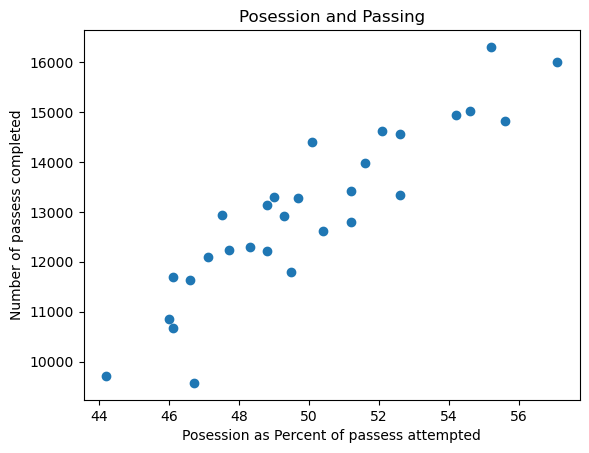

In [47]:
plt.scatter(passing_possesion_x,passing_possesion_y['Cmp_alpha'])
plt.xlabel('Posession as Percent of passess attempted')
plt.ylabel('Number of passess completed')
plt.title('Posession and Passing')
plt.savefig('possession and passing.png')

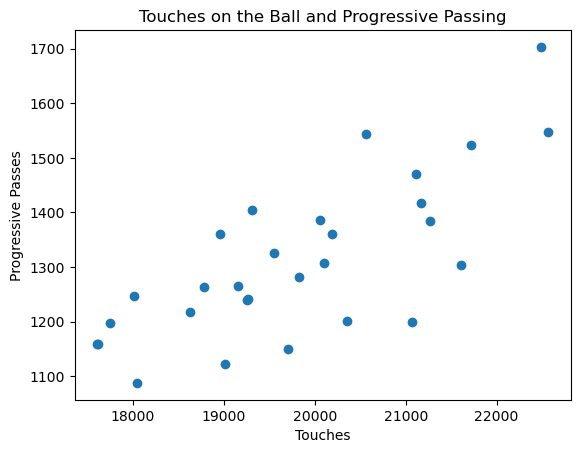

In [48]:
plt.scatter(passing_possesion_tables_drop['Touches'],passing_possesion_tables_drop['PrgP'])
plt.xlabel('Touches')
plt.ylabel('Progressive Passes')
plt.title('Touches on the Ball and Progressive Passing')
plt.savefig('Touches on the Ball and Progressive Passing')

#  Defense, Tackles in the Attacking Third and Goals Conceded

In [49]:
defensive_actions = table_ref['Squad Defensive Actions Squad Stats']
tackles = defensive_actions.columns.get_level_values(1)
list(tackles)
defensive_actions.columns = list(tackles)

In [50]:
defensive_actions

Squad  # Pl   90s  Tkl  TklW  Def 3rd  Mid 3rd  Att 3rd  Tkl  \
0        Atlanta Utd    33  34.0  529   310      238      227       64  252   
1             Austin    26  34.0  448   272      227      175       46  217   
2        CF Montréal    31  34.0  476   286      227      190       59  216   
3          Charlotte    32  34.0  417   263      179      182       56  211   
4       Chicago Fire    26  34.0  532   337      283      203       46  242   
5    Colorado Rapids    35  34.0  415   245      212      160       43  197   
6      Columbus Crew    28  34.0  475   286      212      202       61  220   
7        D.C. United    31  34.0  568   362      259      238       71  281   
8          Dynamo FC    25  34.0  486   321      248      181       57  217   
9      FC Cincinnati    27  34.0  542   366      271      203       68  251   
10         FC Dallas    29  34.0  481   282      246      175       60  248   
11       Inter Miami    36  34.0  588   349      280      232       76  325   
12         LA Galaxy    34  34.0  452   286      225      162       65  234   
13    Los Angeles FC    28  34.0  633   392      294      248       91  314   
14     Minnesota Utd    30  34.0  523   333      258      200       65  235   
15         Nashville    24  34.0  507   299      242      191       74  239   
16       New England    32  34.0  476   290      215      211       50  235   
17      NY Red Bulls    28  34.0  595   377      242      255       98  325   
18             NYCFC    29  34.0  515   309      248      209       58  262   
19      Orlando City    28  34.0  456   268      229      162       65  234   
20      Philadelphia    23  34.0  557   324      259      236       62  273   
21  Portland Timbers    31  34.0  558   332      274      212       72  255   
22    Real Salt Lake    31  34.0  489   327      247      184       58  244   
23          San Jose    25  34.0  529   337      280      174       75  270   
24           Seattle    27  34.0  543   361      272      206       65  288   
25       Sporting KC    30  34.0  494   300      215      211       68  247   
26         St. Louis    29  34.0  642   381      307      242       93  314   
27        Toronto FC    39  34.0  575   370      315      210       50  299   
28         Vancouver    28  34.0  566   359      239      241       86  240   

    Att  Tkl%  Lost  Blocks   Sh  Pass  Int  Tkl+Int  Clr  Err  
0   546  46.2   294     336  103   233  269      798  570    9  
1   538  40.3   321     349  121   228  261      709  632   14  
2   477  45.3   261     352  112   240  298      774  552   14  
3   516  40.9   305     351   87   264  271      688  582   12  
4   513  47.2   271     410  137   273  348      880  670   14  
5   452  43.6   255     318  121   197  279      694  668    8  
6   511  43.1   291     334   76   258  313      788  429   11  
7   613  45.8   332     338  104   234  302      870  589   15  
8   492  44.1   275     374  115   259  273      759  645    7  
9   542  46.3   291     401  103   298  346      888  676   10  
10  569  43.6   321     359  114   245  312      793  682    6  
11  681  47.7   356     347   98   249  331      919  477   10  
12  533  43.9   299     355  117   238  302      754  570   13  
13  695  45.2   381     368   74   294  342      975  536    2  
14  515  45.6   280     391  124   267  309      832  707    9  
15  505  47.3   266     357  122   235  322      829  608    2  
16  532  44.2   297     358  131   227  290      766  640    9  
17  652  49.8   327     395   58   337  347      942  485    7  
18  525  49.9   263     384   85   299  258      773  635    7  
19  549  42.6   315     339   97   242  239      695  597    5  
20  614  44.5   341     399  117   282  403      960  561    8  
21  623  40.9   368     362   94   268  308      866  596    6  
22  559  43.6   315     349  103   246  300      789  563    9  
23  641  42.1   371     363  111   252  341      870  649    4  
24  615  46.8   327

In [51]:
defensive_actions_drop = defensive_actions.drop(columns='Squad')
defensive_actions_drop

# Pl   90s  Tkl  TklW  Def 3rd  Mid 3rd  Att 3rd  Tkl  Att  Tkl%  Lost  \
0     33  34.0  529   310      238      227       64  252  546  46.2   294   
1     26  34.0  448   272      227      175       46  217  538  40.3   321   
2     31  34.0  476   286      227      190       59  216  477  45.3   261   
3     32  34.0  417   263      179      182       56  211  516  40.9   305   
4     26  34.0  532   337      283      203       46  242  513  47.2   271   
5     35  34.0  415   245      212      160       43  197  452  43.6   255   
6     28  34.0  475   286      212      202       61  220  511  43.1   291   
7     31  34.0  568   362      259      238       71  281  613  45.8   332   
8     25  34.0  486   321      248      181       57  217  492  44.1   275   
9     27  34.0  542   366      271      203       68  251  542  46.3   291   
10    29  34.0  481   282      246      175       60  248  569  43.6   321   
11    36  34.0  588   349      280      232       76  325  681  47.7   356   
12    34  34.0  452   286      225      162       65  234  533  43.9   299   
13    28  34.0  633   392      294      248       91  314  695  45.2   381   
14    30  34.0  523   333      258      200       65  235  515  45.6   280   
15    24  34.0  507   299      242      191       74  239  505  47.3   266   
16    32  34.0  476   290      215      211       50  235  532  44.2   297   
17    28  34.0  595   377      242      255       98  325  652  49.8   327   
18    29  34.0  515   309      248      209       58  262  525  49.9   263   
19    28  34.0  456   268      229      162       65  234  549  42.6   315   
20    23  34.0  557   324      259      236       62  273  614  44.5   341   
21    31  34.0  558   332      274      212       72  255  623  40.9   368   
22    31  34.0  489   327      247      184       58  244  559  43.6   315   
23    25  34.0  529   337      280      174       75  270  641  42.1   371   
24    27  34.0  543   361      272      206       65  288  615  46.8   327   
25    30  34.0  494   300      215      211       68  247  554  44.6   307   
26    29  34.0  642   381      307      242       93  314  737  42.6   423   
27    39  34.0  575   370      315      210       50  299  583  51.3   284   
28    28  34.0  566   359      239      241       86  240  515  46.6   275   

    Blocks   Sh  Pass  Int  Tkl+Int  Clr  Err  
0      336  103   233  269      798  570    9  
1      349  121   228  261      709  632   14  
2      352  112   240  298      774  552   14  
3      351   87   264  271      688  582   12  
4      410  137   273  348      880  670   14  
5      318  121   197  279      694  668    8  
6      334   76   258  313      788  429   11  
7      338  104   234  302      870  589   15  
8      374  115   259  273      759  645    7  
9      401  103   298  346      888  676   10  
10     359  114   245  312      793  682    6  
11     347   98   249  331      919  477   10  
12     355  117   238  302      754  570   13  
13     368   74   294  342      975  536    2  
14     391  124   267  309      832  707    9  
15     357  122   235  322      829  608    2  
16     358  131   227  290      766  640    9  
17     395   58   337  347      942  485    7  
18     384   85   299  258      773  635    7  
19     339   97   242  239      695  597    5  
20     399  117   282  403      960  561    8  
21     362   94   268  308      866  596    6  
22     349  103   246  300      789  563    9  
23     363  111   252  341      870  649    4  
24     315   83   232  313      856  594    3  
25     332   98   234  366      860  534    8  
26     468  107   361  356      998  693    8  
27     330  106   224  324      899  608   17  
28     350   94   256  350      916  648    9

In [52]:
goals_against = table_ref['Squad Standard Stats Opponet Stats']
goals_against_columns = goals_against.columns.get_level_values(1)
goals_against.columns = list(goals_against_columns)
goals_against

Squad  # Pl   Age  Poss  MP  Starts   Min   90s  Gls  Ast  \
0        vs Atlanta Utd    33  26.6  44.4  34     374  3060  34.0   52   42   
1             vs Austin    26  26.8  48.8  34     374  3060  34.0   54   37   
2        vs CF Montréal    31  26.8  51.7  34     374  3060  34.0   49   36   
3          vs Charlotte    32  26.4  47.3  34     374  3060  34.0   50   30   
4       vs Chicago Fire    26  26.4  53.9  34     374  3060  34.0   49   30   
5    vs Colorado Rapids    35  27.1  53.4  34     374  3060  34.0   54   38   
6      vs Columbus Crew    28  26.4  42.9  34     374  3060  34.0   45   32   
7        vs D.C. United    31  26.3  50.5  34     374  3060  34.0   48   35   
8          vs Dynamo FC    25  26.8  48.4  34     374  3060  34.0   37   18   
9      vs FC Cincinnati    27  26.4  51.2  34     374  3060  34.0   37   21   
10         vs FC Dallas    29  27.1  51.2  34     374  3060  34.0   33   23   
11       vs Inter Miami    36  26.7  45.4  34     374  3060  34.0   51   41   
12         vs LA Galaxy    34  27.2  44.8  34     374  3060  34.0   65   45   
13    vs Los Angeles FC    28  27.2  48.8  34     374  3060  34.0   38   28   
14     vs Minnesota Utd    30  27.1  52.9  34     374  3060  34.0   50   37   
15         vs Nashville    24  26.3  52.3  34     374  3060  34.0   31   20   
16       vs New England    32  26.4  50.3  34     374  3060  34.0   45   36   
17      vs NY Red Bulls    28  26.6  53.3  34     374  3060  34.0   37   23   
18             vs NYCFC    29  26.5  47.4  34     374  3060  34.0   38   24   
19      vs Orlando City    28  26.5  49.6  34     374  3060  34.0   38   28   
20      vs Philadelphia    23  26.5  53.9  34     374  3060  34.0   38   24   
21  vs Portland Timbers    31  26.6  54.0  34     374  3060  34.0   55   45   
22    vs Real Salt Lake    31  26.8  50.7  34     374  3060  34.0   49   38   
23          vs San Jose    25  27.0  52.5  34     374  3060  34.0   43   26   
24           vs Seattle    27  27.0  45.8  34     374  3060  34.0   30   24   
25       vs Sporting KC    30  26.9  47.9  34     374  3060  34.0   51   35   
26         vs St. Louis    29  27.2  55.8  34     374  3060  34.0   43   31   
27        vs Toronto FC    39  26.3  49.9  34     374  3060  34.0   57   37   
28         vs Vancouver    28  26.9  51.0  34     374  3060  34.0   47   35   

    ...   Gls   Ast   G+A  G-PK  G+A-PK    xG   xAG  xG+xAG  npxG  npxG+xAG  
0   ...  1.53  1.24  2.76  1.44    2.68  1.35  1.03    2.38  1.26      2.29  
1   ...  1.59  1.09  2.68  1.50    2.59  1.47  1.05    2.51  1.40      2.44  
2   ...  1.44  1.06  2.50  1.35    2.41  1.48  1.10    2.58  1.41      2.51  
3   ...  1.47  0.88  2.35  1.26    2.15  1.46  1.05    2.51  1.31      2.35  
4   ...  1.44  0.88  2.32  1.15    2.03  1.50  1.02    2.52  1.26      2.27  
5   ...  1.59  1.12  2.71  1.53    2.65  1.39  0.99    2.39  1.33      2.32  
6   ...  1.32  0.94  2.26  1.24    2.18  1.21  0.94    2.15  1.13      2.07  
7   ...  1.41  1.03  2.44  1.26    2.29  1.25  0.94    2.19  1.14      2.07  
8   ...  1.09  0.53  1.62  0.91    1.44  1.21  0.71    1.92  1.07      1.78  
9   ...  1.09  0.62  1.71  0.94    1.56  1.20  0.72    1.91  1.08      1.80  
10  ...  0.97  0.68  1.65  0.94    1.62  1.08  0.77    1.85  1.01      1.78  
11  ...  1.50  1.21  2.71  1.47    2.68  1.53  1.21    2.74  1.51      2.72  
12  ...  1.91  1.32  3.24  1.79    3.12  1.60  1.20    2.80  1.51      2.71  
13  ...  1.12  0.82  1.94  1.03    1.85  1.12  0.79    1.91  1.00      1.80  
14  ...  1.47  1.09  2.56  1.44    2.53  1.40  1.08    2.48  1.38      2.46  
15  ...  0.91  0.59  1.50  0.76    1.35  1.06  0.70    1.77  0.95      1.65  
16  ...  1.32  1.06  2.38  1.24    2.29  1.32  1.02    2.34  1.23      2.25  
17  ...  1.09  0.68  1.76  0.91    1.59  1.00  0.67    1.67  0.84      1.51  
18  ...  1.12  0.71  1.82  1.00    1.71  1.06  0.76    1.82  0.97      1.72  
19  ...  1.12  0.82  1.94  1.06    1.88  1.20  0.90    2.10  1.13      2.03  
20  ...  

In [53]:
goals_against['Squad'] = goals_against['Squad'].str.lstrip(' vs ')
goals_against

Squad  # Pl   Age  Poss  MP  Starts   Min   90s  Gls  Ast  ...  \
0        Atlanta Utd    33  26.6  44.4  34     374  3060  34.0   52   42  ...   
1             Austin    26  26.8  48.8  34     374  3060  34.0   54   37  ...   
2        CF Montréal    31  26.8  51.7  34     374  3060  34.0   49   36  ...   
3          Charlotte    32  26.4  47.3  34     374  3060  34.0   50   30  ...   
4       Chicago Fire    26  26.4  53.9  34     374  3060  34.0   49   30  ...   
5    Colorado Rapids    35  27.1  53.4  34     374  3060  34.0   54   38  ...   
6      Columbus Crew    28  26.4  42.9  34     374  3060  34.0   45   32  ...   
7        D.C. United    31  26.3  50.5  34     374  3060  34.0   48   35  ...   
8          Dynamo FC    25  26.8  48.4  34     374  3060  34.0   37   18  ...   
9      FC Cincinnati    27  26.4  51.2  34     374  3060  34.0   37   21  ...   
10         FC Dallas    29  27.1  51.2  34     374  3060  34.0   33   23  ...   
11       Inter Miami    36  26.7  45.4  34     374  3060  34.0   51   41  ...   
12         LA Galaxy    34  27.2  44.8  34     374  3060  34.0   65   45  ...   
13    Los Angeles FC    28  27.2  48.8  34     374  3060  34.0   38   28  ...   
14     Minnesota Utd    30  27.1  52.9  34     374  3060  34.0   50   37  ...   
15         Nashville    24  26.3  52.3  34     374  3060  34.0   31   20  ...   
16       New England    32  26.4  50.3  34     374  3060  34.0   45   36  ...   
17      NY Red Bulls    28  26.6  53.3  34     374  3060  34.0   37   23  ...   
18             NYCFC    29  26.5  47.4  34     374  3060  34.0   38   24  ...   
19      Orlando City    28  26.5  49.6  34     374  3060  34.0   38   28  ...   
20      Philadelphia    23  26.5  53.9  34     374  3060  34.0   38   24  ...   
21  Portland Timbers    31  26.6  54.0  34     374  3060  34.0   55   45  ...   
22    Real Salt Lake    31  26.8  50.7  34     374  3060  34.0   49   38  ...   
23          San Jose    25  27.0  52.5  34     374  3060  34.0   43   26  ...   
24           Seattle    27  27.0  45.8  34     374  3060  34.0   30   24  ...   
25       Sporting KC    30  26.9  47.9  34     374  3060  34.0   51   35  ...   
26         St. Louis    29  27.2  55.8  34     374  3060  34.0   43   31  ...   
27        Toronto FC    39  26.3  49.9  34     374  3060  34.0   57   37  ...   
28         Vancouver    28  26.9  51.0  34     374  3060  34.0   47   35  ...   

     Gls   Ast   G+A  G-PK  G+A-PK    xG   xAG  xG+xAG  npxG  npxG+xAG  
0   1.53  1.24  2.76  1.44    2.68  1.35  1.03    2.38  1.26      2.29  
1   1.59  1.09  2.68  1.50    2.59  1.47  1.05    2.51  1.40      2.44  
2   1.44  1.06  2.50  1.35    2.41  1.48  1.10    2.58  1.41      2.51  
3   1.47  0.88  2.35  1.26    2.15  1.46  1.05    2.51  1.31      2.35  
4   1.44  0.88  2.32  1.15    2.03  1.50  1.02    2.52  1.26      2.27  
5   1.59  1.12  2.71  1.53    2.65  1.39  0.99    2.39  1.33      2.32  
6   1.32  0.94  2.26  1.24    2.18  1.21  0.94    2.15  1.13      2.07  
7   1.41  1.03  2.44  1.26    2.29  1.25  0.94    2.19  1.14      2.07  
8   1.09  0.53  1.62  0.91    1.44  1.21  0.71    1.92  1.07      1.78  
9   1.09  0.62  1.71  0.94    1.56  1.20  0.72    1.91  1.08      1.80  
10  0.97  0.68  1.65  0.94    1.62  1.08  0.77    1.85  1.01      1.78  
11  1.50  1.21  2.71  1.47    2.68  1.53  1.21    2.74  1.51      2.72  
12  1.91  1.32  3.24  1.79    3.12  1.60  1.20    2.80  1.51      2.71  
13  1.12  0.82  1.94  1.03    1.85  1.12  0.79    1.91  1.00      1.80  
14  1.47  1.09  2.56  1.44    2.53  1.40  1.08    2.48  1.38      2.46  
15  0.91  0.59  1.50  0.76    1.35  1.06  0.70    1.77  0.95      1.65  
16  1.32  1.06  2.38  1.24    2.29  1.32  1.02    2.34  1.23      2.25  
17  1.09  0.68  1.76  0.91    1.59  1.00  0.67    1.67  0.84      1.51  
18  1.12  0.71  1.82  1.00    1.71  1.06  0.76    1.82  0.97      1.72  
19  1.12  0.82  1.94  1.06    1.88  1.20  0.90    2.10  1.13      2.03  
20  1.12  0.71  1.82  0.94    1.65  1.30  0.93    2

In [54]:
goals_against_defensive_actions = goals_against.merge(defensive_actions, how = 'inner', on = 'Squad')
goals_against_defensive_actions

Squad  # Pl_x   Age  Poss  MP  Starts   Min  90s_x  Gls  Ast  \
0        Atlanta Utd      33  26.6  44.4  34     374  3060   34.0   52   42   
1             Austin      26  26.8  48.8  34     374  3060   34.0   54   37   
2        CF Montréal      31  26.8  51.7  34     374  3060   34.0   49   36   
3          Charlotte      32  26.4  47.3  34     374  3060   34.0   50   30   
4       Chicago Fire      26  26.4  53.9  34     374  3060   34.0   49   30   
5    Colorado Rapids      35  27.1  53.4  34     374  3060   34.0   54   38   
6      Columbus Crew      28  26.4  42.9  34     374  3060   34.0   45   32   
7        D.C. United      31  26.3  50.5  34     374  3060   34.0   48   35   
8          Dynamo FC      25  26.8  48.4  34     374  3060   34.0   37   18   
9      FC Cincinnati      27  26.4  51.2  34     374  3060   34.0   37   21   
10         FC Dallas      29  27.1  51.2  34     374  3060   34.0   33   23   
11       Inter Miami      36  26.7  45.4  34     374  3060   34.0   51   41   
12         LA Galaxy      34  27.2  44.8  34     374  3060   34.0   65   45   
13    Los Angeles FC      28  27.2  48.8  34     374  3060   34.0   38   28   
14     Minnesota Utd      30  27.1  52.9  34     374  3060   34.0   50   37   
15         Nashville      24  26.3  52.3  34     374  3060   34.0   31   20   
16       New England      32  26.4  50.3  34     374  3060   34.0   45   36   
17      NY Red Bulls      28  26.6  53.3  34     374  3060   34.0   37   23   
18             NYCFC      29  26.5  47.4  34     374  3060   34.0   38   24   
19      Orlando City      28  26.5  49.6  34     374  3060   34.0   38   28   
20      Philadelphia      23  26.5  53.9  34     374  3060   34.0   38   24   
21  Portland Timbers      31  26.6  54.0  34     374  3060   34.0   55   45   
22    Real Salt Lake      31  26.8  50.7  34     374  3060   34.0   49   38   
23          San Jose      25  27.0  52.5  34     374  3060   34.0   43   26   
24           Seattle      27  27.0  45.8  34     374  3060   34.0   30   24   
25       Sporting KC      30  26.9  47.9  34     374  3060   34.0   51   35   
26         St. Louis      29  27.2  55.8  34     374  3060   34.0   43   31   
27        Toronto FC      39  26.3  49.9  34     374  3060   34.0   57   37   
28         Vancouver      28  26.9  51.0  34     374  3060   34.0   47   35   

    ...  Att  Tkl%  Lost  Blocks   Sh  Pass  Int  Tkl+Int  Clr  Err  
0   ...  546  46.2   294     336  103   233  269      798  570    9  
1   ...  538  40.3   321     349  121   228  261      709  632   14  
2   ...  477  45.3   261     352  112   240  298      774  552   14  
3   ...  516  40.9   305     351   87   264  271      688  582   12  
4   ...  513  47.2   271     410  137   273  348      880  670   14  
5   ...  452  43.6   255     318  121   197  279      694  668    8  
6   ...  511  43.1   291     334   76   258  313      788  429   11  
7   ...  613  45.8   332     338  104   234  302      870  589   15  
8   ...  492  44.1   275     374  115   259  273      759  645    7  
9   ...  542  46.3   291     401  103   298  346      888  676   10  
10  ...  569  43.6   321     359  114   245  312      793  682    6  
11  ...  681  47.7   356     347   98   249  331      919  477   10  
12  ...  533  43.9   299     355  117   238  302      754  570   13  
13  ...  695  45.2   381     368   74   294  342      975  536    2  
14  ...  515  45.6   280     391  124   267  309      832  707    9  
15  ...  505  47.3   266     357  122   235  322      829  608    2  
16  ...  532  44.2   297     358  131   227  290      766  640    9  
17  ...  652  49.8   327     395   58   337  347      942  485    7  
18  ...  525  49.9   263     384   85   299  258      773  635    7  
19  ...  549  42.6   315     339   97   242  239      695  597    5  
20  ...  614  44.5   341     399  117   282  403      960  561    8  
21  ...  623  40.9   368     362   94   268  308      866  596    6  
22  ...  559  43.6   315     349  

In [55]:
goals_against_defensive_actions_drop = goals_against_defensive_actions.drop(columns = 'Squad')
goals_against_defensive_actions_drop

# Pl_x   Age  Poss  MP  Starts   Min  90s_x  Gls  Ast  G+A  ...  Att  \
0       33  26.6  44.4  34     374  3060   34.0   52   42   94  ...  546   
1       26  26.8  48.8  34     374  3060   34.0   54   37   91  ...  538   
2       31  26.8  51.7  34     374  3060   34.0   49   36   85  ...  477   
3       32  26.4  47.3  34     374  3060   34.0   50   30   80  ...  516   
4       26  26.4  53.9  34     374  3060   34.0   49   30   79  ...  513   
5       35  27.1  53.4  34     374  3060   34.0   54   38   92  ...  452   
6       28  26.4  42.9  34     374  3060   34.0   45   32   77  ...  511   
7       31  26.3  50.5  34     374  3060   34.0   48   35   83  ...  613   
8       25  26.8  48.4  34     374  3060   34.0   37   18   55  ...  492   
9       27  26.4  51.2  34     374  3060   34.0   37   21   58  ...  542   
10      29  27.1  51.2  34     374  3060   34.0   33   23   56  ...  569   
11      36  26.7  45.4  34     374  3060   34.0   51   41   92  ...  681   
12      34  27.2  44.8  34     374  3060   34.0   65   45  110  ...  533   
13      28  27.2  48.8  34     374  3060   34.0   38   28   66  ...  695   
14      30  27.1  52.9  34     374  3060   34.0   50   37   87  ...  515   
15      24  26.3  52.3  34     374  3060   34.0   31   20   51  ...  505   
16      32  26.4  50.3  34     374  3060   34.0   45   36   81  ...  532   
17      28  26.6  53.3  34     374  3060   34.0   37   23   60  ...  652   
18      29  26.5  47.4  34     374  3060   34.0   38   24   62  ...  525   
19      28  26.5  49.6  34     374  3060   34.0   38   28   66  ...  549   
20      23  26.5  53.9  34     374  3060   34.0   38   24   62  ...  614   
21      31  26.6  54.0  34     374  3060   34.0   55   45  100  ...  623   
22      31  26.8  50.7  34     374  3060   34.0   49   38   87  ...  559   
23      25  27.0  52.5  34     374  3060   34.0   43   26   69  ...  641   
24      27  27.0  45.8  34     374  3060   34.0   30   24   54  ...  615   
25      30  26.9  47.9  34     374  3060   34.0   51   35   86  ...  554   
26      29  27.2  55.8  34     374  3060   34.0   43   31   74  ...  737   
27      39  26.3  49.9  34     374  3060   34.0   57   37   94  ...  583   
28      28  26.9  51.0  34     374  3060   34.0   47   35   82  ...  515   

    Tkl%  Lost  Blocks   Sh  Pass  Int  Tkl+Int  Clr  Err  
0   46.2   294     336  103   233  269      798  570    9  
1   40.3   321     349  121   228  261      709  632   14  
2   45.3   261     352  112   240  298      774  552   14  
3   40.9   305     351   87   264  271      688  582   12  
4   47.2   271     410  137   273  348      880  670   14  
5   43.6   255     318  121   197  279      694  668    8  
6   43.1   291     334   76   258  313      788  429   11  
7   45.8   332     338  104   234  302      870  589   15  
8   44.1   275     374  115   259  273      759  645    7  
9   46.3   291     401  103   298  346      888  676   10  
10  43.6   321     359  114   245  312      793  682    6  
11  47.7   356     347   98   249  331      919  477   10  
12  43.9   299     355  117   238  302      754  570   13  
13  45.2   381     368   74   294  342      975  536    2  
14  45.6   280     391  124   267  309      832  707    9  
15  47.3   266     357  122   235  322      829  608    2  
16  44.2   297     358  131   227  290      766  640    9  
17  49.8   327     395   58   337  347      942  485    7  
18  49.9   263     384   85   299  258      773  635    7  
19  42.6   315     339   97   242  239      695  597    5  
20  44.5   341     399  117   282  403      960  561    8  
21  40.9   368     362   94   268  308      866  596    6  
22  43.6   315     349  103   246  300      789  563    9  
23  42.1   371     363  111   252  341      870  649    4  
24  46.8   327     315   83   232  313      856  594    3  
25  44.6   307     332   98   234  366      860  534    8  
26  42.6   423     468  107   361  356      998  693    8  
27  51.3   284     330  106   224  324     

In [56]:
goals_against_defensive_actions_drop.corr()[['Tkl+Int' , 'Clr', 'Att 3rd', "Gls",'Err']]

Tkl+Int       Clr   Att 3rd       Gls       Gls       Err
# Pl_x   -0.162204 -0.152691 -0.202638  0.674252  0.675272  0.472902
Age       0.084847  0.219875  0.262318  0.085272  0.083387 -0.317274
Poss      0.349106  0.530497  0.166451 -0.149980 -0.149821 -0.114569
MP             NaN       NaN       NaN       NaN       NaN       NaN
Starts         NaN       NaN       NaN       NaN       NaN       NaN
Min            NaN       NaN       NaN       NaN       NaN       NaN
90s_x          NaN       NaN       NaN       NaN       NaN       NaN
Gls      -0.219896 -0.086870 -0.304873  1.000000  0.999957  0.675901
Ast      -0.147158 -0.171973 -0.166319  0.894555  0.893748  0.478765
G+A      -0.190533 -0.130645 -0.245821  0.976079  0.975663  0.598508
G-PK     -0.253295 -0.096104 -0.288449  0.967954  0.968062  0.600660
PK        0.171522  0.052011 -0.011690 -0.048462 -0.049058  0.180356
PKatt     0.201287  0.023461  0.020959 -0.071145 -0.071931  0.091340
CrdY      0.100468 -0.136868  0.457910 -0.368494 -0.368213 -0.296276
CrdR     -0.030194 -0.053943  0.005256 -0.474730 -0.473967 -0.191948
xG       -0.097707  0.090091 -0.314467  0.816391  0.814642  0.641682
npxG     -0.147925  0.084778 -0.320084  0.833173  0.831654  0.618023
xAG      -0.101273 -0.052649 -0.239337  0.856390  0.854190  0.599370
npxG+xAG -0.127591  0.022263 -0.286566  0.854847  0.852991  0.617244
PrgC     -0.048120  0.402771 -0.265620  0.318521  0.318907  0.039243
PrgP      0.073574  0.663187 -0.237632  0.135611  0.134304 -0.020084
Gls      -0.220492 -0.087504 -0.306436  0.999957  1.000000  0.675947
Ast      -0.146911 -0.172821 -0.168597  0.892918  0.892140  0.479996
G+A      -0.191329 -0.128288 -0.245766  0.976052  0.975627  0.597493
G-PK     -0.252486 -0.095296 -0.290174  0.967893  0.967996  0.600472
G+A-PK   -0.208191 -0.134062 -0.237298  0.949635  0.949330  0.554515
xG       -0.097073  0.092416 -0.314276  0.816688  0.815005  0.642862
xAG      -0.102107 -0.055464 -0.242492  0.858301  0.856118  0.605842
xG+xAG   -0.102145  0.024067 -0.286130  0.854118  0.852124  0.634508
npxG     -0.153085  0.083319 -0.324900  0.835056  0.833586  0.621811
npxG+xAG -0.125445  0.017139 -0.283858  0.855205  0.853362  0.615858
# Pl_y   -0.162204 -0.152691 -0.202638  0.674252  0.675272  0.472902
90s_y          NaN       NaN       NaN       NaN       NaN       NaN
Tkl       0.941365 -0.081417  0.720902 -0.227360 -0.227227 -0.174859
TklW      0.880033 -0.016479  0.646789 -0.223151 -0.223224 -0.100808
Def 3rd   0.747045  0.213526  0.346420 -0.145168 -0.144401 -0.092549
Mid 3rd   0.812134 -0.293208  0.639837 -0.166350 -0.166144 -0.042461
Att 3rd   0.691807 -0.242913  1.000000 -0.304873 -0.306436 -0.445928
Tkl       0.813600 -0.255387  0.664319 -0.231794 -0.231236 -0.190709
Att       0.737877 -0.206224  0.684487 -0.177690 -0.178337 -0.273868
Tkl%      0.401942 -0.114267  0.151870 -0.183413 -0.181132  0.093959
Lost      0.548000 -0.128808  0.586974 -0.100774 -0.102359 -0.300153
Blocks    0.496314  0.360633  0.365574 -0.232563 -0.233439 -0.058733
Sh       -0.247230  0.607688 -0.563875  0.254347  0.252641  0.272837
Pass      0.586830  0.018339  0.630114 -0.346760 -0.346686 -0.195690
Int       0.847764 -0.112867  0.476986 -0.154418 -0.156015 -0.094946
Tkl+Int   1.000000 -0.103478  0.691807 -0.219896 -0.220492 -0.158887
Clr      -0.103478  1.000000 -0.242913 -0.086870 -0.087504 -0.044328
Err      -0.158887 -0.044328 -0.445928  0.675901  0.675947  1.000000

In [57]:
goals_against_defensive_actions_x = goals_against_defensive_actions['Att 3rd']
goals_against_defensive_actions_y = goals_against_defensive_actions['Gls']

In [58]:
goals_against_defensive_actions_x

0     64
1     46
2     59
3     56
4     46
5     43
6     61
7     71
8     57
9     68
10    60
11    76
12    65
13    91
14    65
15    74
16    50
17    98
18    58
19    65
20    62
21    72
22    58
23    75
24    65
25    68
26    93
27    50
28    86
Name: Att 3rd, dtype: int64

In [59]:
goals_against_defensive_actions_y

Gls   Gls
0    52  1.53
1    54  1.59
2    49  1.44
3    50  1.47
4    49  1.44
5    54  1.59
6    45  1.32
7    48  1.41
8    37  1.09
9    37  1.09
10   33  0.97
11   51  1.50
12   65  1.91
13   38  1.12
14   50  1.47
15   31  0.91
16   45  1.32
17   37  1.09
18   38  1.12
19   38  1.12
20   38  1.12
21   55  1.62
22   49  1.44
23   43  1.26
24   30  0.88
25   51  1.50
26   43  1.26
27   57  1.68
28   47  1.38

In [60]:
goals_against_defensive_actions_y_list = ['Gls_alpha', 'Gls_beta']
goals_against_defensive_actions_y_list

['Gls_alpha', 'Gls_beta']

In [61]:
goals_against_defensive_actions_y.columns 


Index(['Gls', 'Gls'], dtype='object')

In [62]:
goals_against_defensive_actions_y.columns = goals_against_defensive_actions_y_list

Text(0.5, 1.0, 'Tackles in the attacking third and Goals Conceded')

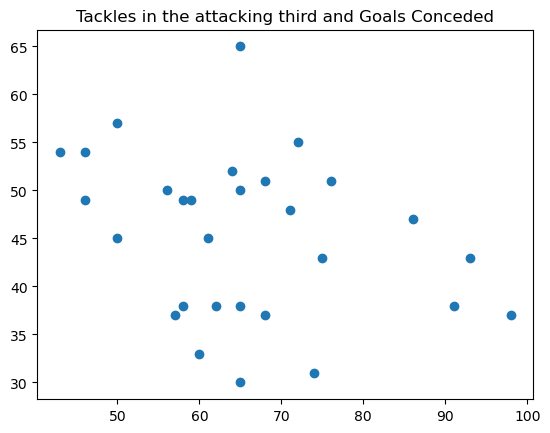

In [63]:
plt.scatter(goals_against_defensive_actions_x, goals_against_defensive_actions_y['Gls_alpha'])
plt.title('Tackles in the attacking third and Goals Conceded')

# Number of players used In Games and Goals Conceded

In [64]:
num_players_x = goals_against_defensive_actions['# Pl_x']
num_players_y = goals_against_defensive_actions_y['Gls_alpha']


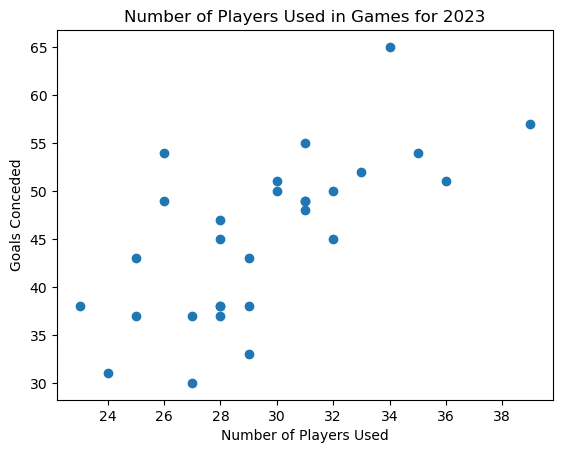

In [65]:
plt.scatter(num_players_x, num_players_y)
plt.xlabel('Number of Players Used')
plt.ylabel('Goals Conceded')
plt.title('Number of Players Used in Games for 2023')
plt.savefig('Number of Players Used in Games')

# Red Cards and Goals Conceded


In [66]:
goals_against

Squad  # Pl   Age  Poss  MP  Starts   Min   90s  Gls  Ast  ...  \
0        Atlanta Utd    33  26.6  44.4  34     374  3060  34.0   52   42  ...   
1             Austin    26  26.8  48.8  34     374  3060  34.0   54   37  ...   
2        CF Montréal    31  26.8  51.7  34     374  3060  34.0   49   36  ...   
3          Charlotte    32  26.4  47.3  34     374  3060  34.0   50   30  ...   
4       Chicago Fire    26  26.4  53.9  34     374  3060  34.0   49   30  ...   
5    Colorado Rapids    35  27.1  53.4  34     374  3060  34.0   54   38  ...   
6      Columbus Crew    28  26.4  42.9  34     374  3060  34.0   45   32  ...   
7        D.C. United    31  26.3  50.5  34     374  3060  34.0   48   35  ...   
8          Dynamo FC    25  26.8  48.4  34     374  3060  34.0   37   18  ...   
9      FC Cincinnati    27  26.4  51.2  34     374  3060  34.0   37   21  ...   
10         FC Dallas    29  27.1  51.2  34     374  3060  34.0   33   23  ...   
11       Inter Miami    36  26.7  45.4  34     374  3060  34.0   51   41  ...   
12         LA Galaxy    34  27.2  44.8  34     374  3060  34.0   65   45  ...   
13    Los Angeles FC    28  27.2  48.8  34     374  3060  34.0   38   28  ...   
14     Minnesota Utd    30  27.1  52.9  34     374  3060  34.0   50   37  ...   
15         Nashville    24  26.3  52.3  34     374  3060  34.0   31   20  ...   
16       New England    32  26.4  50.3  34     374  3060  34.0   45   36  ...   
17      NY Red Bulls    28  26.6  53.3  34     374  3060  34.0   37   23  ...   
18             NYCFC    29  26.5  47.4  34     374  3060  34.0   38   24  ...   
19      Orlando City    28  26.5  49.6  34     374  3060  34.0   38   28  ...   
20      Philadelphia    23  26.5  53.9  34     374  3060  34.0   38   24  ...   
21  Portland Timbers    31  26.6  54.0  34     374  3060  34.0   55   45  ...   
22    Real Salt Lake    31  26.8  50.7  34     374  3060  34.0   49   38  ...   
23          San Jose    25  27.0  52.5  34     374  3060  34.0   43   26  ...   
24           Seattle    27  27.0  45.8  34     374  3060  34.0   30   24  ...   
25       Sporting KC    30  26.9  47.9  34     374  3060  34.0   51   35  ...   
26         St. Louis    29  27.2  55.8  34     374  3060  34.0   43   31  ...   
27        Toronto FC    39  26.3  49.9  34     374  3060  34.0   57   37  ...   
28         Vancouver    28  26.9  51.0  34     374  3060  34.0   47   35  ...   

     Gls   Ast   G+A  G-PK  G+A-PK    xG   xAG  xG+xAG  npxG  npxG+xAG  
0   1.53  1.24  2.76  1.44    2.68  1.35  1.03    2.38  1.26      2.29  
1   1.59  1.09  2.68  1.50    2.59  1.47  1.05    2.51  1.40      2.44  
2   1.44  1.06  2.50  1.35    2.41  1.48  1.10    2.58  1.41      2.51  
3   1.47  0.88  2.35  1.26    2.15  1.46  1.05    2.51  1.31      2.35  
4   1.44  0.88  2.32  1.15    2.03  1.50  1.02    2.52  1.26      2.27  
5   1.59  1.12  2.71  1.53    2.65  1.39  0.99    2.39  1.33      2.32  
6   1.32  0.94  2.26  1.24    2.18  1.21  0.94    2.15  1.13      2.07  
7   1.41  1.03  2.44  1.26    2.29  1.25  0.94    2.19  1.14      2.07  
8   1.09  0.53  1.62  0.91    1.44  1.21  0.71    1.92  1.07      1.78  
9   1.09  0.62  1.71  0.94    1.56  1.20  0.72    1.91  1.08      1.80  
10  0.97  0.68  1.65  0.94    1.62  1.08  0.77    1.85  1.01      1.78  
11  1.50  1.21  2.71  1.47    2.68  1.53  1.21    2.74  1.51      2.72  
12  1.91  1.32  3.24  1.79    3.12  1.60  1.20    2.80  1.51      2.71  
13  1.12  0.82  1.94  1.03    1.85  1.12  0.79    1.91  1.00      1.80  
14  1.47  1.09  2.56  1.44    2.53  1.40  1.08    2.48  1.38      2.46  
15  0.91  0.59  1.50  0.76    1.35  1.06  0.70    1.77  0.95      1.65  
16  1.32  1.06  2.38  1.24    2.29  1.32  1.02    2.34  1.23      2.25  
17  1.09  0.68  1.76  0.91    1.59  1.00  0.67    1.67  0.84      1.51  
18  1.12  0.71  1.82  1.00    1.71  1.06  0.76    1.82  0.97      1.72  
19  1.12  0.82  1.94  1.06    1.88  1.20  0.90    2.10  1.13      2.03  
20  1.12  0.71  1.82  0.94    1.65  1.30  0.93    2

In [67]:
CrdR_goals_against = goals_against['CrdR']
goals_against_defensive_actions_y['Gls_alpha']

0     52
1     54
2     49
3     50
4     49
5     54
6     45
7     48
8     37
9     37
10    33
11    51
12    65
13    38
14    50
15    31
16    45
17    37
18    38
19    38
20    38
21    55
22    49
23    43
24    30
25    51
26    43
27    57
28    47
Name: Gls_alpha, dtype: int64

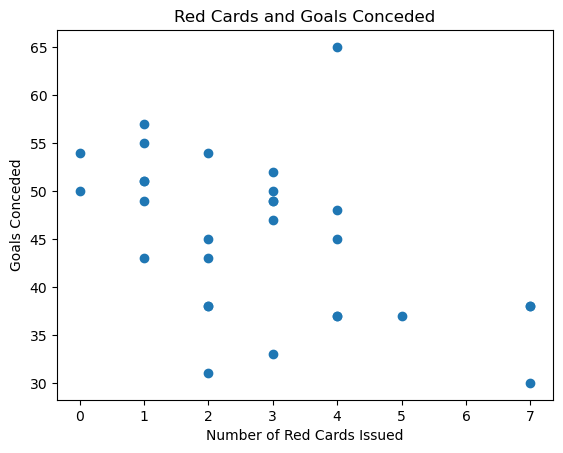

In [68]:
plt.scatter(CrdR_goals_against,goals_against_defensive_actions_y['Gls_alpha'])
plt.xlabel('Number of Red Cards Issued')
plt.ylabel('Goals Conceded')
plt.title('Red Cards and Goals Conceded')
plt.savefig('Red Cards')

In [69]:
goals_against_defensive_actions_y['Gls_alpha'].corr(goals_against['CrdR'])

-0.4747302241719114

# Penalty kicks conceded and Goals Conceded

In [70]:
table_misc = table_ref['Squad Miscellaneous Stats Squad Stats']
table_misc_columns = table_misc.columns.get_level_values(1)
list(table_misc_columns)
table_misc.columns = table_misc_columns
table_misc

Squad  # Pl   90s  CrdY  CrdR  2CrdY  Fls  Fld  Off  Crs  Int  \
0        Atlanta Utd    33  34.0    73     4      2  409  380   58  522  269   
1             Austin    26  34.0    59     2      2  340  363   59  692  261   
2        CF Montréal    31  34.0    68     3      1  416  360   59  590  298   
3          Charlotte    32  34.0    88     0      0  455  368   44  676  271   
4       Chicago Fire    26  34.0    86     6      6  393  430   69  571  348   
5    Colorado Rapids    35  34.0    83     4      2  403  320   42  554  279   
6      Columbus Crew    28  34.0    61     1      1  384  341   52  542  313   
7        D.C. United    31  34.0    70     2      1  463  408   74  598  302   
8          Dynamo FC    25  34.0    95     5      3  435  381   59  481  273   
9      FC Cincinnati    27  34.0    79     5      4  422  429   53  458  346   
10         FC Dallas    29  34.0    69     2      0  384  366   59  495  312   
11       Inter Miami    36  34.0    83     3      1  412  363   62  418  331   
12         LA Galaxy    34  34.0    76     4      3  364  413   42  599  302   
13    Los Angeles FC    28  34.0    73     1      0  443  370   61  538  342   
14     Minnesota Utd    30  34.0    57     1      1  342  323   72  646  309   
15         Nashville    24  34.0    74     6      5  376  369   82  608  322   
16       New England    32  34.0    49     2      1  353  374   59  601  290   
17      NY Red Bulls    28  34.0    90     4      4  497  447   51  545  347   
18             NYCFC    29  34.0    79     1      0  405  428   68  492  258   
19      Orlando City    28  34.0    67     1      0  394  451   51  547  239   
20      Philadelphia    23  34.0    85     5      2  465  368   90  585  403   
21  Portland Timbers    31  34.0    82     0      0  466  375   39  581  308   
22    Real Salt Lake    31  34.0    75     2      1  390  340   79  682  300   
23          San Jose    25  34.0    73     4      1  344  358   53  628  341   
24           Seattle    27  34.0    61     2      2  348  376   55  715  313   
25       Sporting KC    30  34.0    58     4      1  334  376   44  671  366   
26         St. Louis    29  34.0    80     4      3  481  356   42  602  356   
27        Toronto FC    39  34.0    51     3      2  322  424   58  345  324   
28         Vancouver    28  34.0    66     1      1  408  358   59  726  350   

    TklW  PKwon  PKcon  OG  Recov  Won  Lost  Won%  
0    310      1      4   1   1651  359   305  54.1  
1    272      2      3   1   1525  416   460  47.5  
2    286      1      3   3   1945  362   422  46.2  
3    263      5      7   2   1902  474   467  50.4  
4    337      2     11   2   1880  430   445  49.1  
5    245      3      3   0   1579  403   441  47.7  
6    286      5      4   1   1802  249   322  43.6  
7    362      2      5   1   1795  622   395  61.2  
8    321      5      6   1   1704  361   396  47.7  
9    366      6      5   2   1911  491   372  56.9  
10   282      1      3   4   1654  392   410  48.9  
11   349      4      1   3   1804  281   379  42.6  
12   286      3      4   2   1682  246   270  47.7  
13   392      8      5   1   2028  409   358  53.3  
14   333      4      1   1   1827  445   462  49.1  
15   299      5      5   1   1707  518   485  51.6  
16   290      1      4   1   1787  400   392  50.5  
17   377      3      7   2   2206  688   657  51.2  
18   309      2      4   1   1779  393   378  51.0  
19   268      2      3   1   1655  336   439  43.4  
20   324      9      6   3   1915  466   466  50.0  
21   332      0      3   3   1849  452   471  49.0  
22   327      0      5   1   1814  365   412  47.0  
23   337      5      7   0   1837  365   335  52.1  
24   361      1      1   2   1857  443   422  51.2  
25   300      4      7   0   1740  350   328  51.6  
26   381      4      7   2   2015  529   551  49.0  
27   370      1      4   2   1807  334   320  51.1  
28   359      8      1   1   1778  423   442  48.9

In [71]:
misc_goals_against = table_misc.merge(goals_against, how = 'inner', on = 'Squad') 
misc_goals_against

Squad  # Pl_x  90s_x  CrdY_x  CrdR_x  2CrdY  Fls  Fld  Off  \
0        Atlanta Utd      33   34.0      73       4      2  409  380   58   
1             Austin      26   34.0      59       2      2  340  363   59   
2        CF Montréal      31   34.0      68       3      1  416  360   59   
3          Charlotte      32   34.0      88       0      0  455  368   44   
4       Chicago Fire      26   34.0      86       6      6  393  430   69   
5    Colorado Rapids      35   34.0      83       4      2  403  320   42   
6      Columbus Crew      28   34.0      61       1      1  384  341   52   
7        D.C. United      31   34.0      70       2      1  463  408   74   
8          Dynamo FC      25   34.0      95       5      3  435  381   59   
9      FC Cincinnati      27   34.0      79       5      4  422  429   53   
10         FC Dallas      29   34.0      69       2      0  384  366   59   
11       Inter Miami      36   34.0      83       3      1  412  363   62   
12         LA Galaxy      34   34.0      76       4      3  364  413   42   
13    Los Angeles FC      28   34.0      73       1      0  443  370   61   
14     Minnesota Utd      30   34.0      57       1      1  342  323   72   
15         Nashville      24   34.0      74       6      5  376  369   82   
16       New England      32   34.0      49       2      1  353  374   59   
17      NY Red Bulls      28   34.0      90       4      4  497  447   51   
18             NYCFC      29   34.0      79       1      0  405  428   68   
19      Orlando City      28   34.0      67       1      0  394  451   51   
20      Philadelphia      23   34.0      85       5      2  465  368   90   
21  Portland Timbers      31   34.0      82       0      0  466  375   39   
22    Real Salt Lake      31   34.0      75       2      1  390  340   79   
23          San Jose      25   34.0      73       4      1  344  358   53   
24           Seattle      27   34.0      61       2      2  348  376   55   
25       Sporting KC      30   34.0      58       4      1  334  376   44   
26         St. Louis      29   34.0      80       4      3  481  356   42   
27        Toronto FC      39   34.0      51       3      2  322  424   58   
28         Vancouver      28   34.0      66       1      1  408  358   59   

    Crs  ...   Gls   Ast   G+A  G-PK  G+A-PK    xG   xAG  xG+xAG  npxG  \
0   522  ...  1.53  1.24  2.76  1.44    2.68  1.35  1.03    2.38  1.26   
1   692  ...  1.59  1.09  2.68  1.50    2.59  1.47  1.05    2.51  1.40   
2   590  ...  1.44  1.06  2.50  1.35    2.41  1.48  1.10    2.58  1.41   
3   676  ...  1.47  0.88  2.35  1.26    2.15  1.46  1.05    2.51  1.31   
4   571  ...  1.44  0.88  2.32  1.15    2.03  1.50  1.02    2.52  1.26   
5   554  ...  1.59  1.12  2.71  1.53    2.65  1.39  0.99    2.39  1.33   
6   542  ...  1.32  0.94  2.26  1.24    2.18  1.21  0.94    2.15  1.13   
7   598  ...  1.41  1.03  2.44  1.26    2.29  1.25  0.94    2.19  1.14   
8   481  ...  1.09  0.53  1.62  0.91    1.44  1.21  0.71    1.92  1.07   
9   458  ...  1.09  0.62  1.71  0.94    1.56  1.20  0.72    1.91  1.08   
10  495  ...  0.97  0.68  1.65  0.94    1.62  1.08  0.77    1.85  1.01   
11  418  ...  1.50  1.21  2.71  1.47    2.68  1.53  1.21    2.74  1.51   
12  599  ...  1.91  1.32  3.24  1.79    3.12  1.60  1.20    2.80  1.51   
13  538  ...  1.12  0.82  1.94  1.03    1.85  1.12  0.79    1.91  1.00   
14  646  ...  1.47  1.09  2.56  1.44    2.53  1.40  1.08    2.48  1.38   
15  608  ...  0.91  0.59  1.50  0.76    1.35  1.06  0.70    1.77  0.95   
16  601  ...  1.32  1.06  2.38  1.24    2.29  1.32  1.02    2.34  1.23   
17  545  ...  1.09  0.68  1.76  0.91    1.59  1.00  0.67    1.67  0.84   
18  492  ...  1.12  0.71  1.82  1.00    1.71  1.06  0.76    1.82  0.97   
19  547  ...  1.12  0.82  1.94  1.06    1.88  1.20  0.90    2.10  1.13   
20  585  ...  1.12  0.71  1.82  0.94    1.65  1.30  0.93    2.23  1.17   
21  581  ...  1.62  1.32  2.94  1.53    2.85  1.30  1.03    2.33  1.23   
22

In [72]:
misc_goals_against_drop = misc_goals_against.drop(columns = 'Squad')
misc_goals_against_drop 

# Pl_x  90s_x  CrdY_x  CrdR_x  2CrdY  Fls  Fld  Off  Crs  Int  ...   Gls  \
0       33   34.0      73       4      2  409  380   58  522  269  ...  1.53   
1       26   34.0      59       2      2  340  363   59  692  261  ...  1.59   
2       31   34.0      68       3      1  416  360   59  590  298  ...  1.44   
3       32   34.0      88       0      0  455  368   44  676  271  ...  1.47   
4       26   34.0      86       6      6  393  430   69  571  348  ...  1.44   
5       35   34.0      83       4      2  403  320   42  554  279  ...  1.59   
6       28   34.0      61       1      1  384  341   52  542  313  ...  1.32   
7       31   34.0      70       2      1  463  408   74  598  302  ...  1.41   
8       25   34.0      95       5      3  435  381   59  481  273  ...  1.09   
9       27   34.0      79       5      4  422  429   53  458  346  ...  1.09   
10      29   34.0      69       2      0  384  366   59  495  312  ...  0.97   
11      36   34.0      83       3      1  412  363   62  418  331  ...  1.50   
12      34   34.0      76       4      3  364  413   42  599  302  ...  1.91   
13      28   34.0      73       1      0  443  370   61  538  342  ...  1.12   
14      30   34.0      57       1      1  342  323   72  646  309  ...  1.47   
15      24   34.0      74       6      5  376  369   82  608  322  ...  0.91   
16      32   34.0      49       2      1  353  374   59  601  290  ...  1.32   
17      28   34.0      90       4      4  497  447   51  545  347  ...  1.09   
18      29   34.0      79       1      0  405  428   68  492  258  ...  1.12   
19      28   34.0      67       1      0  394  451   51  547  239  ...  1.12   
20      23   34.0      85       5      2  465  368   90  585  403  ...  1.12   
21      31   34.0      82       0      0  466  375   39  581  308  ...  1.62   
22      31   34.0      75       2      1  390  340   79  682  300  ...  1.44   
23      25   34.0      73       4      1  344  358   53  628  341  ...  1.26   
24      27   34.0      61       2      2  348  376   55  715  313  ...  0.88   
25      30   34.0      58       4      1  334  376   44  671  366  ...  1.50   
26      29   34.0      80       4      3  481  356   42  602  356  ...  1.26   
27      39   34.0      51       3      2  322  424   58  345  324  ...  1.68   
28      28   34.0      66       1      1  408  358   59  726  350  ...  1.38   

     Ast   G+A  G-PK  G+A-PK    xG   xAG  xG+xAG  npxG  npxG+xAG  
0   1.24  2.76  1.44    2.68  1.35  1.03    2.38  1.26      2.29  
1   1.09  2.68  1.50    2.59  1.47  1.05    2.51  1.40      2.44  
2   1.06  2.50  1.35    2.41  1.48  1.10    2.58  1.41      2.51  
3   0.88  2.35  1.26    2.15  1.46  1.05    2.51  1.31      2.35  
4   0.88  2.32  1.15    2.03  1.50  1.02    2.52  1.26      2.27  
5   1.12  2.71  1.53    2.65  1.39  0.99    2.39  1.33      2.32  
6   0.94  2.26  1.24    2.18  1.21  0.94    2.15  1.13      2.07  
7   1.03  2.44  1.26    2.29  1.25  0.94    2.19  1.14      2.07  
8   0.53  1.62  0.91    1.44  1.21  0.71    1.92  1.07      1.78  
9   0.62  1.71  0.94    1.56  1.20  0.72    1.91  1.08      1.80  
10  0.68  1.65  0.94    1.62  1.08  0.77    1.85  1.01      1.78  
11  1.21  2.71  1.47    2.68  1.53  1.21    2.74  1.51      2.72  
12  1.32  3.24  1.79    3.12  1.60  1.20    2.80  1.51      2.71  
13  0.82  1.94  1.03    1.85  1.12  0.79    1.91  1.00      1.80  
14  1.09  2.56  1.44    2.53  1.40  1.08    2.48  1.38      2.46  
15  0.59  1.50  0.76    1.35  1.06  0.70    1.77  0.95      1.65  
16  1.06  2.38  1.24    2.29  1.32  1.02    2.34  1.23      2.25  
17  0.68  1.76  0.91    1.59  1.00  0.67    1.67  0.84      1.51  
18  0.71  1.82  1.00    1.71  1.06  0.76    1.82  0.97      1.72  
19  0.82  1.94  1.06    1.88  1.20  0.90    2.10  1.13      2.03  
20  0.71  1.82  0.94    1.65  1.30  0.93    2.23  1.17      2.10  
21  1.32  2.94  1.53    2.85  1.30  1.03    2.33  1.23      2.26  
22  1.12  2.56  1.32    2.44  1.43  1.10    2.53  1.31      2.

In [73]:
misc_goals_against_drop.corr()[['PKcon', 'Gls']]

PKcon       Gls       Gls
# Pl_x   -0.323049  0.674252  0.675272
90s_x          NaN       NaN       NaN
CrdY_x    0.435938 -0.147159 -0.145029
CrdR_x    0.512425 -0.123097 -0.123402
2CrdY     0.483013 -0.101985 -0.102621
Fls       0.272843 -0.206029 -0.204348
Fld       0.320882 -0.141812 -0.138251
Off       0.024011 -0.324008 -0.323432
Crs      -0.015126  0.034958  0.030446
Int       0.327389 -0.154418 -0.156015
TklW      0.118540 -0.223151 -0.223224
PKwon     0.147601 -0.268773 -0.268753
PKcon     1.000000 -0.071145 -0.071931
OG       -0.114993 -0.085726 -0.084444
Recov     0.362774 -0.271808 -0.272460
Won       0.288674 -0.376056 -0.375640
Lost      0.148720 -0.332870 -0.332285
Won%      0.277195 -0.168679 -0.168413
# Pl_y   -0.323049  0.674252  0.675272
Age      -0.239607  0.085272  0.083387
Poss      0.297332 -0.149980 -0.149821
MP             NaN       NaN       NaN
Starts         NaN       NaN       NaN
Min            NaN       NaN       NaN
90s_y          NaN       NaN       NaN
Gls      -0.071145  1.000000  0.999957
Ast      -0.330669  0.894555  0.893748
G+A      -0.199334  0.976079  0.975663
G-PK     -0.306208  0.967954  0.968062
PK        0.947443 -0.048462 -0.049058
PKatt     1.000000 -0.071145 -0.071931
CrdY_y    0.039272 -0.368494 -0.368213
CrdR_y    0.034735 -0.474730 -0.473967
xG        0.130188  0.816391  0.814642
npxG     -0.146176  0.833173  0.831654
xAG      -0.138122  0.856390  0.854190
npxG+xAG -0.144353  0.854847  0.852991
PrgC     -0.237798  0.318521  0.318907
PrgP     -0.038270  0.135611  0.134304
Gls      -0.071931  0.999957  1.000000
Ast      -0.335494  0.892918  0.892140
G+A      -0.201099  0.976052  0.975627
G-PK     -0.305106  0.967893  0.967996
G+A-PK   -0.323132  0.949635  0.949330
xG        0.128587  0.816688  0.815005
xAG      -0.132664  0.858301  0.856118
xG+xAG    0.007781  0.854118  0.852124
npxG     -0.143651  0.835056  0.833586
npxG+xAG -0.147408  0.855205  0.853362